In [357]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [359]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [360]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2020, 2021):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0        1        2        3        4  5
0  20200101 170000  1.12120  1.12121  1.12117  1.12120  0
1  20200101 170100  1.12106  1.12135  1.12106  1.12135  0
2  20200101 170200  1.12136  1.12139  1.12136  1.12139  0
3  20200101 170300  1.12135  1.12135  1.12120  1.12122  0
4  20200101 170400  1.12122  1.12125  1.12122  1.12125  0


In [361]:
data.tail()

,0,1,2,3,4,5
372330,20201231 165400,1.22159,1.22182,1.22153,1.22175,0
372331,20201231 165500,1.22175,1.22180,1.22170,1.22174,0
372332,20201231 165600,1.22176,1.22179,1.22160,1.22165,0
372333,20201231 165700,1.22166,1.22167,1.22153,1.22164,0
372334,20201231 165800,1.22163,1.22168,1.22143,1.22153,0


In [362]:
data.shape

(372335, 6)

In [363]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [364]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
372331,20201231 165500,1.22175,1.22180,1.22170,1.22174,0
372332,20201231 165600,1.22176,1.22179,1.22160,1.22165,0
372333,20201231 165700,1.22166,1.22167,1.22153,1.22164,0
372334,20201231 165800,1.22163,1.22168,1.22143,1.22153,0


In [365]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [366]:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])

DateTime
2020-10-25 19:00:00    2
2020-10-25 19:01:00    2
2020-10-25 19:02:00    2
2020-10-25 19:03:00    2
2020-10-25 19:04:00    2
2020-10-25 19:05:00    2
2020-10-25 19:06:00    2
2020-10-25 19:07:00    2
2020-10-25 19:08:00    2
2020-10-25 19:09:00    2
2020-10-25 19:10:00    2
2020-10-25 19:11:00    2
2020-10-25 19:12:00    2
2020-10-25 19:13:00    2
2020-10-25 19:14:00    2
2020-10-25 19:15:00    2
2020-10-25 19:16:00    2
2020-10-25 19:17:00    2
2020-10-25 19:18:00    2
2020-10-25 19:19:00    2
2020-10-25 19:20:00    2
2020-10-25 19:21:00    2
2020-10-25 19:22:00    2
2020-10-25 19:23:00    2
2020-10-25 19:24:00    2
2020-10-25 19:25:00    2
2020-10-25 19:26:00    2
2020-10-25 19:27:00    2
2020-10-25 19:28:00    2
2020-10-25 19:29:00    2
2020-10-25 19:30:00    2
2020-10-25 19:31:00    2
2020-10-25 19:32:00    2
2020-10-25 19:33:00    2
2020-10-25 19:34:00    2
2020-10-25 19:35:00    2
2020-10-25 19:36:00    2
2020-10-25 19:37:00    2
2020-10-25 19:38:00    2
2020-10-25 19:39

In [367]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)


                  DateTime     Open     High      Low    Close  Volume
304280 2020-10-25 19:00:00  1.18479  1.18486  1.18467  1.18478       0
304340 2020-10-25 19:00:00  1.18479  1.18486  1.18467  1.18478       0
304281 2020-10-25 19:01:00  1.18476  1.18478  1.18467  1.18472       0
304341 2020-10-25 19:01:00  1.18476  1.18478  1.18467  1.18472       0
304282 2020-10-25 19:02:00  1.18473  1.18492  1.18468  1.18487       0
...                    ...      ...      ...      ...      ...     ...
304337 2020-10-25 19:57:00  1.18451  1.18463  1.18450  1.18453       0
304398 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
304338 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
304339 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0
304399 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0

[120 rows x 6 columns]


In [368]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
372330,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0
372331,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0
372332,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0
372333,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0
372334,2020-12-31 16:58:00,1.22163,1.22168,1.22143,1.22153,0


In [369]:
data.set_index('DateTime', inplace=True)

In [370]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0
2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0
2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0
2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0
2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0
...,...,...,...,...,...
2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0
2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0
2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0


In [371]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [372]:
full_range

DatetimeIndex(['2020-01-01 17:00:00', '2020-01-01 17:01:00',
               '2020-01-01 17:02:00', '2020-01-01 17:03:00',
               '2020-01-01 17:04:00', '2020-01-01 17:05:00',
               '2020-01-01 17:06:00', '2020-01-01 17:07:00',
               '2020-01-01 17:08:00', '2020-01-01 17:09:00',
               ...
               '2020-12-31 16:49:00', '2020-12-31 16:50:00',
               '2020-12-31 16:51:00', '2020-12-31 16:52:00',
               '2020-12-31 16:53:00', '2020-12-31 16:54:00',
               '2020-12-31 16:55:00', '2020-12-31 16:56:00',
               '2020-12-31 16:57:00', '2020-12-31 16:58:00'],
              dtype='datetime64[ns]', length=525599, freq='min')

In [373]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2020-01-02 17:20:00', '2020-01-02 17:21:00',
               '2020-01-02 17:23:00', '2020-01-02 17:28:00',
               '2020-01-03 15:47:00', '2020-01-03 17:00:00',
               '2020-01-03 17:01:00', '2020-01-03 17:02:00',
               '2020-01-03 17:03:00', '2020-01-03 17:04:00',
               ...
               '2020-12-29 17:42:00', '2020-12-29 17:46:00',
               '2020-12-29 17:55:00', '2020-12-29 17:56:00',
               '2020-12-29 17:59:00', '2020-12-29 18:50:00',
               '2020-12-29 23:24:00', '2020-12-30 17:55:00',
               '2020-12-30 18:33:00', '2020-12-30 18:56:00'],
              dtype='datetime64[ns]', length=153324, freq=None)


In [374]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-01-01 17:35:00,1.12148,1.12153,1.12147,1.12150,0
2020-01-01 17:36:00,1.12150,1.12150,1.12150,1.12150,0
2020-01-01 17:37:00,1.12154,1.12154,1.12151,1.12151,0
2020-01-01 17:38:00,1.12154,1.12155,1.12152,1.12153,0
2020-01-01 17:39:00,1.12153,1.12153,1.12152,1.12152,0
2020-01-01 17:40:00,1.12154,1.12154,1.12154,1.12154,0
2020-01-01 17:41:00,1.12154,1.12155,1.12154,1.12155,0
2020-01-01 17:42:00,1.12155,1.12155,1.12154,1.12154,0
2020-01-01 17:43:00,1.12156,1.12156,1.12154,1.12155,0


In [375]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-01-01 17:50:00,1.12155,1.12166,1.12154,1.12159,0
2020-01-01 17:51:00,1.12159,1.12162,1.12155,1.12155,0
2020-01-01 17:52:00,1.12156,1.12160,1.12156,1.12156,0
2020-01-01 17:53:00,1.12155,1.12157,1.12155,1.12157,0
2020-01-01 17:54:00,1.12156,1.12157,1.12155,1.12155,0
2020-01-01 17:55:00,1.12155,1.12155,1.12155,1.12155,0
2020-01-01 17:56:00,1.12155,1.12155,1.12154,1.12154,0
2020-01-01 17:57:00,1.12154,1.12154,1.12149,1.12151,0
2020-01-01 17:58:00,1.12151,1.12152,1.12146,1.12146,0


In [376]:
missing_timestamps.shape   # All missing timestamps (including weekends)

(153324,)

In [377]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [378]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2020-01-02 17:20:00,1
1,2020-01-02 17:21:00,1
2,2020-01-02 17:23:00,1
3,2020-01-02 17:28:00,1
4,2020-01-03 15:47:00,1
...,...,...
153319,2020-12-29 18:50:00,1
153320,2020-12-29 23:24:00,1
153321,2020-12-30 17:55:00,1
153322,2020-12-30 18:33:00,1


In [379]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [380]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [381]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [382]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,NaN
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,NaN
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,NaN
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,NaN
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,NaN
...,...,...,...,...,...,...,...
525654,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,NaN
525655,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,NaN
525656,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,NaN
525657,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,NaN


In [383]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [384]:
combined_df.shape

(525659, 7)

In [385]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [386]:
'''
####   DUPLICATED DATA ANALYSIS  #####
# plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''

"\n####   DUPLICATED DATA ANALYSIS  #####\n# plt.figure(figsize=(22, 5))\nplt.bar(dup_per_day.index, dup_per_day.values, color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n\n\n# Plot duplicate occurrences per day\nplt.figure(figsize=(22, 5))\ndup_per_day.plot(kind='bar', color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n"

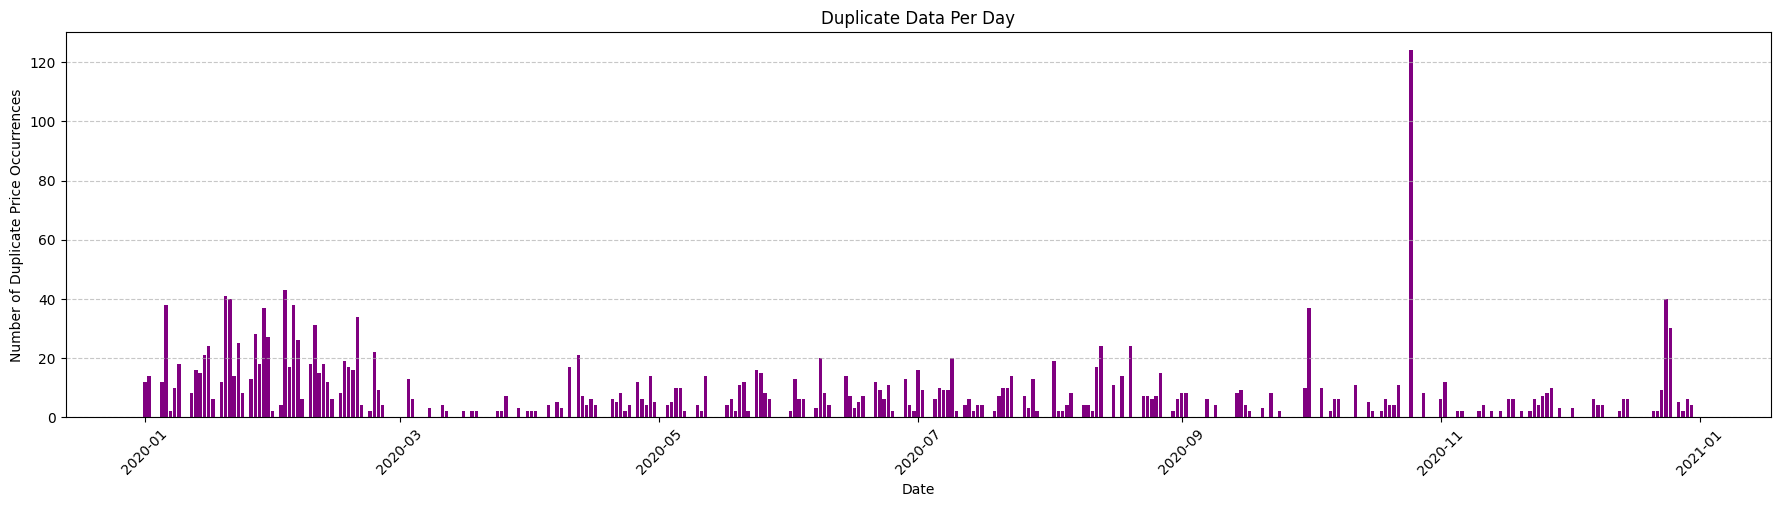

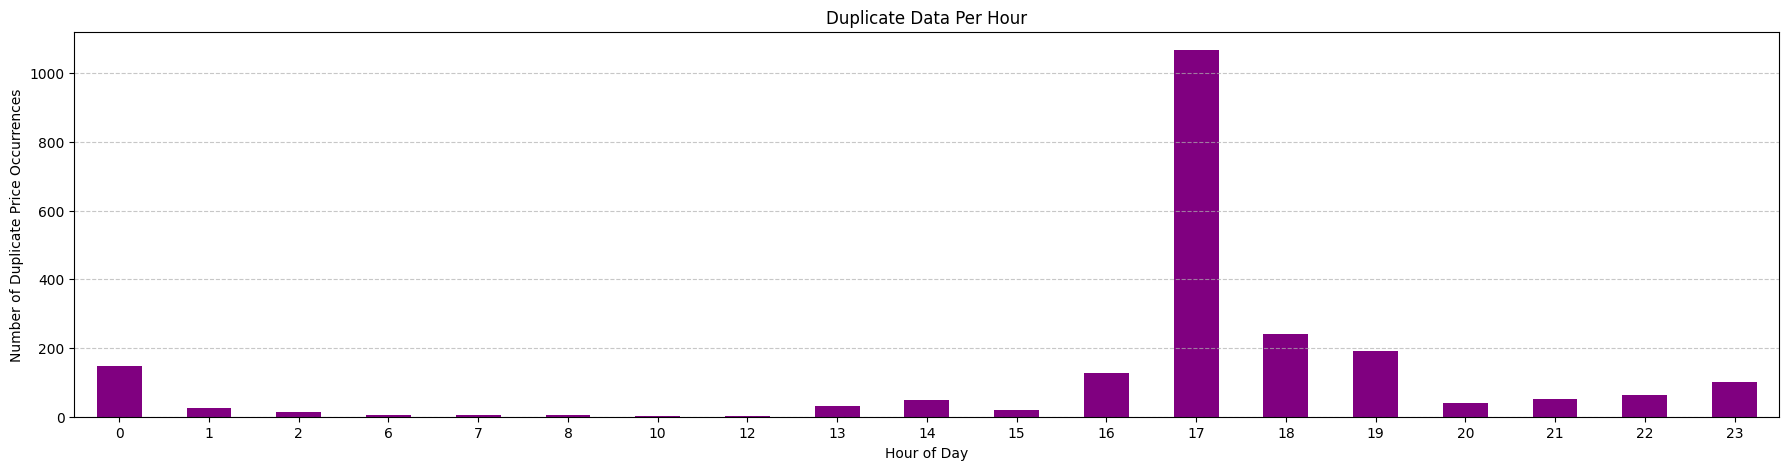

In [387]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

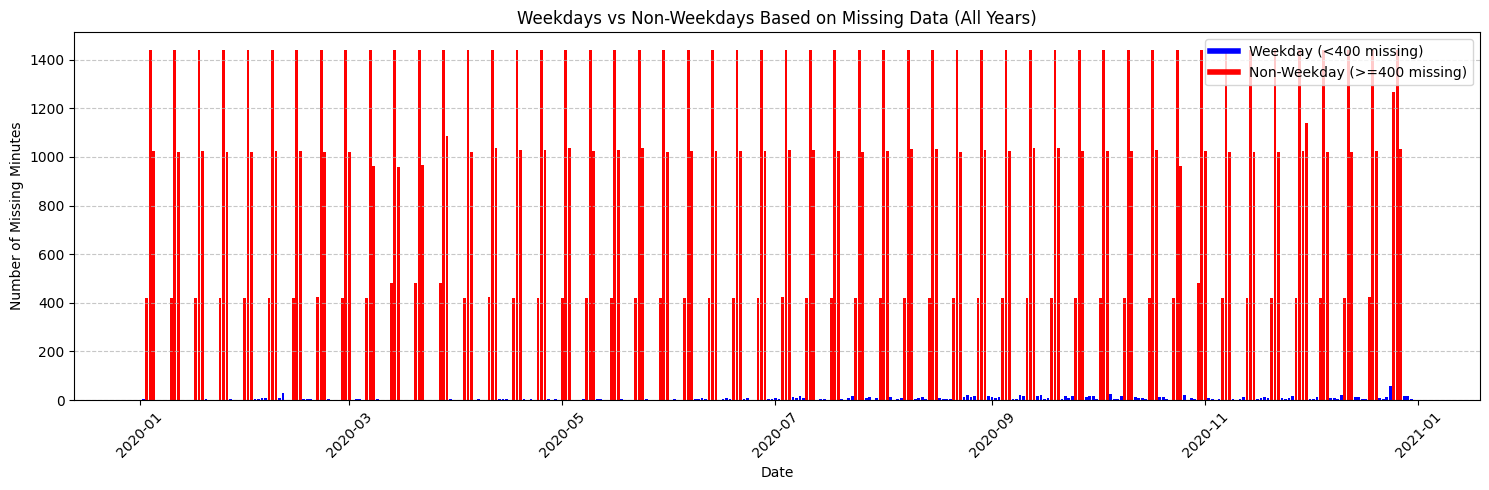

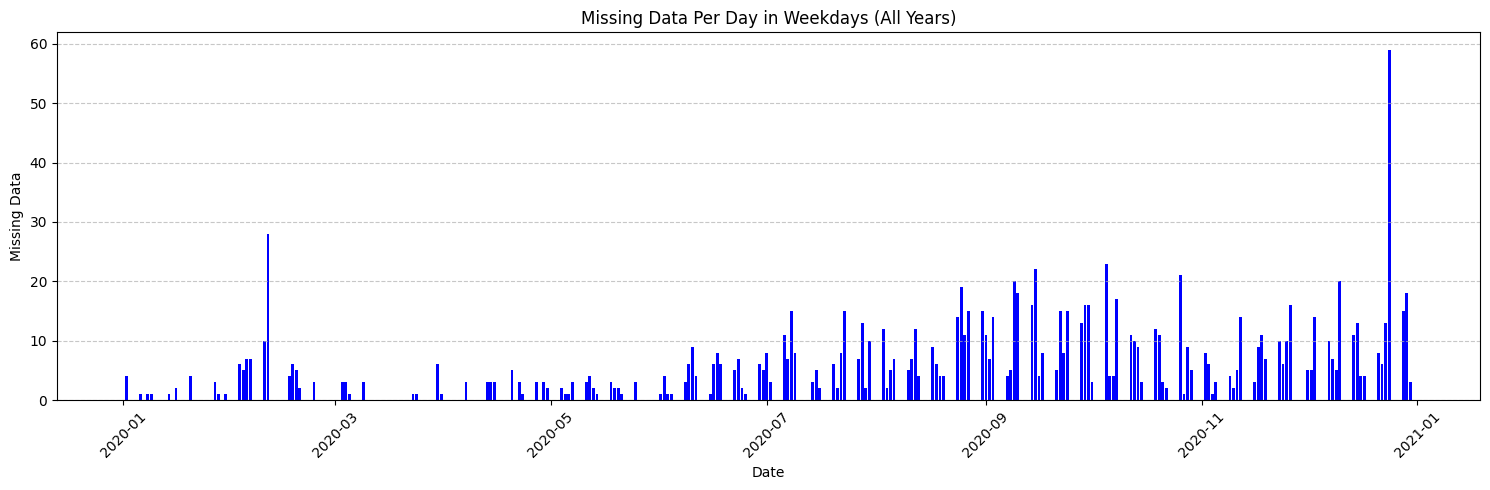

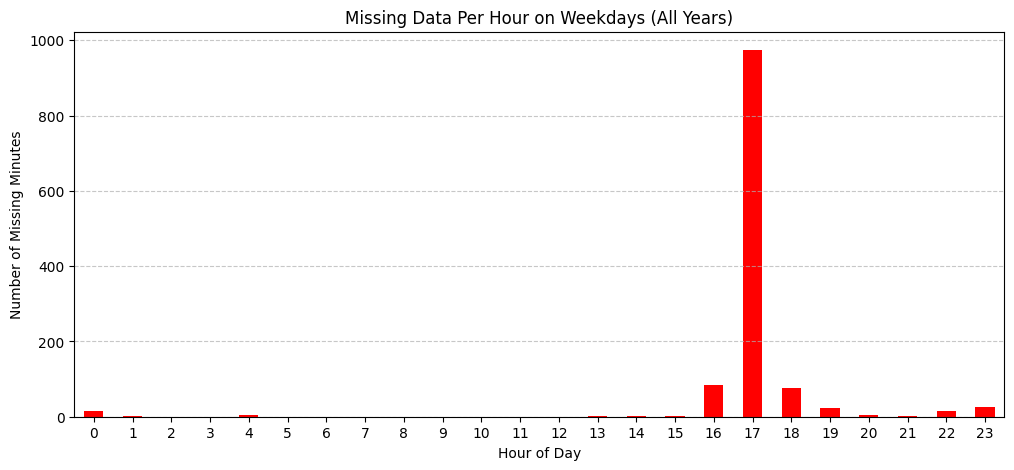

In [388]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

plt.figure(figsize=(15, 5))
colors = ['blue' if date in weekdays else 'red' for date in missing_per_day.index]
plt.bar(missing_per_day.index, missing_per_day.values, color=colors)

plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Weekday (<400 missing)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Non-Weekday (>=400 missing)')
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()
plt.show()


weekday_missing_data = missing_per_day[weekdays]
plt.figure(figsize=(15, 5))
plt.bar(weekday_missing_data.index, weekday_missing_data.values, color='blue')

plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [389]:
missing_per_day

DateTime
2020-01-01       0
2020-01-02       4
2020-01-03     421
2020-01-04    1440
2020-01-05    1023
              ... 
2020-12-27    1031
2020-12-28      15
2020-12-29      18
2020-12-30       3
2020-12-31       0
Name: indicator, Length: 366, dtype: int64

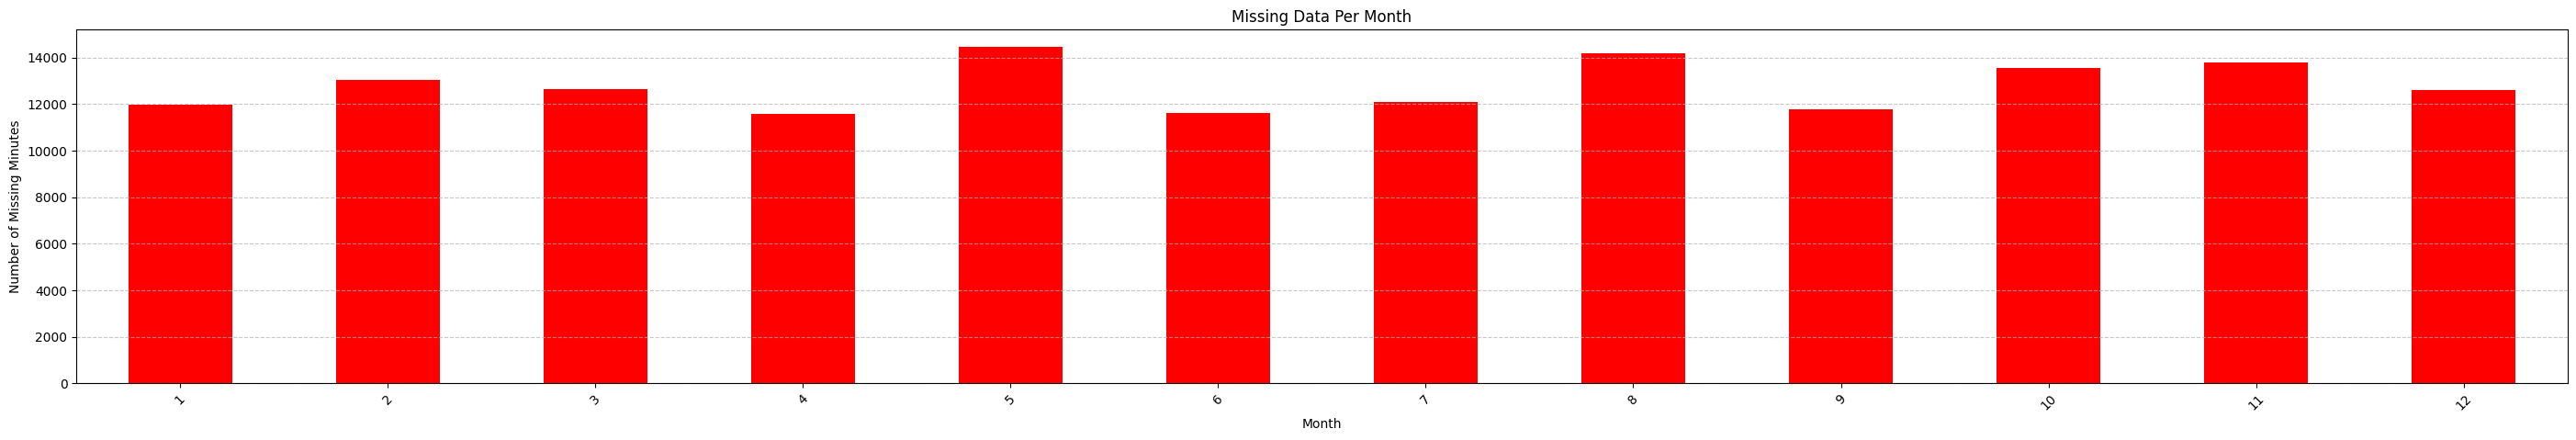

In [390]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [391]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [392]:
print(missing_per_month)

DateTime
1     11967
2     13055
3     12635
4     11586
5     14474
6     11615
7     12090
8     14167
9     11781
10    13546
11    13805
12    12603
Name: indicator, dtype: int64


In [393]:
sum(missing_per_month)-(11520*12)

15084

In [394]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df


In [395]:
final_data_clean = process_duplicated_data(combined_df)

Removing 60 rows with duplicate timestamps…
Marking 4873 duplicates and flat bars…


In [396]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [397]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [398]:
final_data_clean

,DateTime,Open,High,Low,Close,Volume,indicator
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,0
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,0
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,0
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,0
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,0
...,...,...,...,...,...,...,...
525594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0
525595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0
525596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0
525597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0


In [399]:
final_data = final_data_clean.copy()
# Ensure 'DateTime' is the index
#final_data.index = pd.to_datetime(final_data.index)

<Axes: >

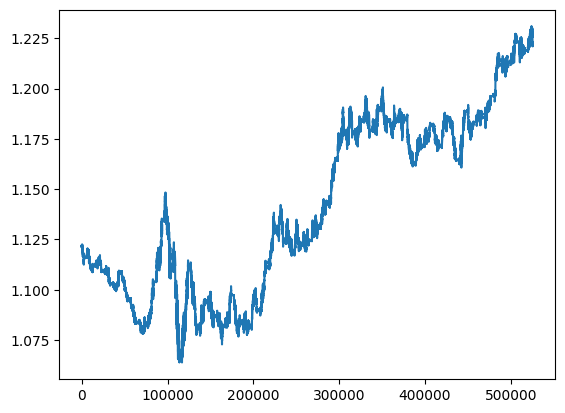

In [400]:
final_data['Close'].plot()    ### plot data nicely including years

In [401]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,0
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,0
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,0
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,0
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,0
...,...,...,...,...,...,...,...
525594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0
525595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0
525596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0
525597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0


In [402]:
data = final_data.copy()

In [403]:
data['Close'].iloc[374920:374950].max()

np.float64(1.18558)

In [404]:
data['Close'].nlargest(n=5)

524406    1.23088
524419    1.23087
524428    1.23087
523688    1.23086
524426    1.23085
Name: Close, dtype: float64

In [405]:
max_idx = data['Close'].idxmax()
max_idx

524406

In [406]:
data.loc[max_idx, :] = np.nan

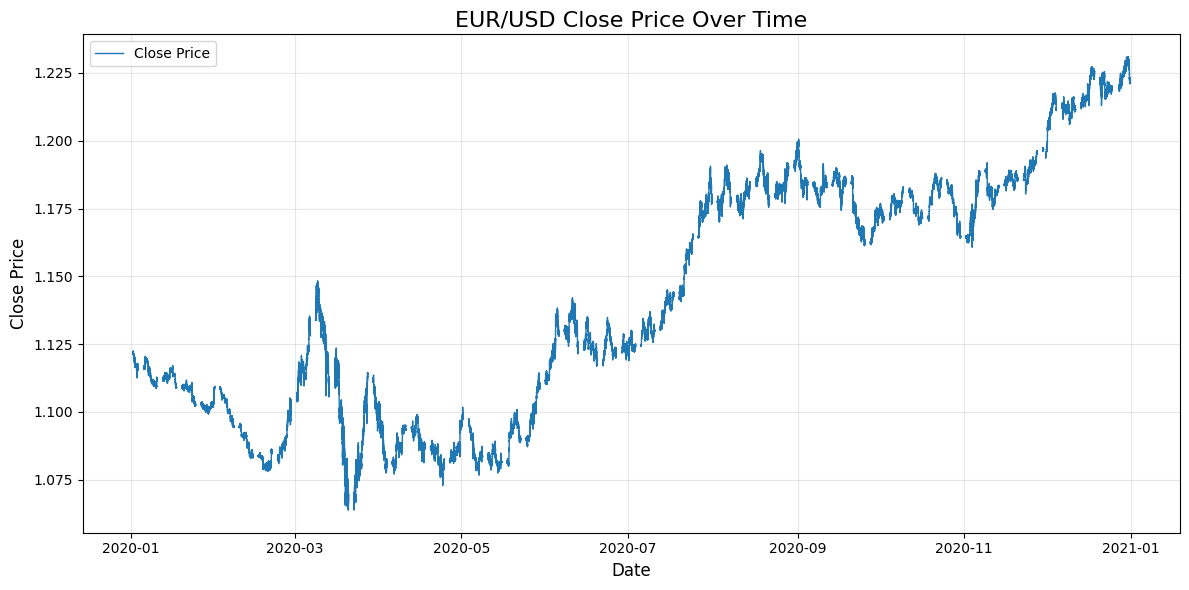

In [407]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [408]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,0.0,17.0
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,0.0,17.0
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,0.0,17.0
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,0.0,17.0
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...
525594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0.0,16.0
525595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0.0,16.0
525596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0.0,16.0
525597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0.0,16.0


In [409]:
#data.reset_index(inplace=True)

In [410]:
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,0.0,17.0
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,0.0,17.0
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,0.0,17.0
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,0.0,17.0
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...
525594,2020-12-31 16:54:00,1.22159,1.22182,1.22153,1.22175,0.0,0.0,16.0
525595,2020-12-31 16:55:00,1.22175,1.22180,1.22170,1.22174,0.0,0.0,16.0
525596,2020-12-31 16:56:00,1.22176,1.22179,1.22160,1.22165,0.0,0.0,16.0
525597,2020-12-31 16:57:00,1.22166,1.22167,1.22153,1.22164,0.0,0.0,16.0


In [411]:
#data.drop(columns=['index'], inplace=True)

In [412]:
data.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120,0.0,0.0,17.0
1,2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135,0.0,0.0,17.0
2,2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139,0.0,0.0,17.0
3,2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122,0.0,0.0,17.0
4,2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125,0.0,0.0,17.0
5,2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,0.0,0.0,17.0
6,2020-01-01 17:06:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
7,2020-01-01 17:07:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
8,2020-01-01 17:08:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0
9,2020-01-01 17:09:00,NaN,NaN,NaN,NaN,0.0,1.0,17.0


In [413]:
# Count how many times each timestamp appears:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])


Series([], Name: count, dtype: int64)


In [414]:
df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
df['mid'] = (df['bid '] + df['ask'])/2

# 1. Make sure your time column is datetime and floor it to the minute
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.floor('T')

# 2. Assign group_id by “which minute‐bin” each row belongs to
df['group_id'] = df.groupby('minute').ngroup()

# 3. Now compute the OHLC on mid for each group_id
mid_ohlc = (
    df
    .groupby('group_id')
    .agg(
        minute = ('minute', 'first'),
        open   = ('mid',    'first'),
        high   = ('mid',    'max'),
        low    = ('mid',    'min'),
        close  = ('mid',    'last')
    )
    .reset_index()
)

# mid_ohlc now has:
#   group_id | minute           | open      | high      | low       | close
#   -------------------------------------------------------------------------
#     0      | 2025-02-19 08:00 | 609.6209  | 609.6287  | 609.6209  | …
#     1      | 2025-02-19 08:01 | 609.4673  | 609.5114  | 609.4503  | …
#     2      | 2025-02-19 08:02 | …         | …         | …         | …



C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\461763248.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\461763248.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])
C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\461763248.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['time'].dt.floor('T')


In [415]:
mid_ohlc

,group_id,minute,open,high,low,close
0,0.0,2025-02-19 08:00:00,609.620921,609.718208,609.435313,609.469308
1,1.0,2025-02-19 08:01:00,609.458008,609.531182,609.437541,609.474540
2,2.0,2025-02-19 08:02:00,609.472416,609.530265,609.427305,609.446263
3,3.0,2025-02-19 08:03:00,609.439725,609.490422,609.400389,609.425303
4,4.0,2025-02-19 08:04:00,609.419199,609.421599,609.263119,609.277285
...,...,...,...,...,...,...
776,776.0,2025-02-19 20:56:00,610.653237,610.653237,610.366333,610.403551
777,777.0,2025-02-19 20:57:00,610.403186,610.421814,610.076369,610.155527
778,778.0,2025-02-19 20:58:00,610.156854,610.246400,610.081910,610.179745
779,779.0,2025-02-19 20:59:00,610.174585,610.208648,610.006565,610.129943


In [416]:
# assuming your per-minute OHLC is in mid_ohlc

# 1. Create `indicator` = 1 if any of open/high/low/close is NaN, else 0
mid_ohlc['indicator'] = (
    mid_ohlc[['open','high','low','close']]
    .isnull()
    .any(axis=1)
    .astype(int)
)

# Now mid_ohlc looks like:
#    group_id  minute              open      high       low      close  indicator
# 0         0 2025-02-19 08:00:00  609.6209  609.7182  609.4353  609.4693          0
# 1         1 2025-02-19 08:01:00  609.4580  609.5312  609.4375  609.4745          0
# ...     ...                 ...       ...       ...       ...       ...
# n       781 2025-02-19 21:01:00       NaN       NaN       NaN       NaN          1


In [417]:
mid_ohlc['DateTime'] = pd.to_datetime(mid_ohlc['minute'])

In [418]:
mid_ohlc = mid_ohlc.drop(columns=['minute'])

In [419]:
# Rename the lowercase OHLC columns to Titlecase
mid_ohlc = mid_ohlc.rename(columns={
    'open':  'Open',
    'high':  'High',
    'low':   'Low',
    'close': 'Close'
})

# Add a Volume column, all zeros (same length as mid_ohlc)
mid_ohlc['Volume'] = 0

In [420]:
mid_ohlc['Close'].std()

np.float64(1.153493339611402)

In [421]:
data.iloc[6150:6200]

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
6150,2020-01-05 23:30:00,1.11632,1.11633,1.11631,1.11631,0.0,0.0,23.0
6151,2020-01-05 23:31:00,1.11631,1.11633,1.11628,1.11628,0.0,0.0,23.0
6152,2020-01-05 23:32:00,1.11628,1.11633,1.11626,1.11633,0.0,0.0,23.0
6153,2020-01-05 23:33:00,NaN,NaN,NaN,NaN,0.0,1.0,23.0
6154,2020-01-05 23:34:00,NaN,NaN,NaN,NaN,0.0,1.0,23.0
6155,2020-01-05 23:35:00,1.11632,1.11637,1.11629,1.11629,0.0,0.0,23.0
6156,2020-01-05 23:36:00,1.11630,1.11633,1.11626,1.11628,0.0,0.0,23.0
6157,2020-01-05 23:37:00,1.11628,1.11628,1.11626,1.11628,0.0,0.0,23.0
6158,2020-01-05 23:38:00,1.11628,1.11628,1.11626,1.11626,0.0,0.0,23.0
6159,2020-01-05 23:39:00,1.11627,1.11628,1.11625,1.11627,0.0,0.0,23.0


In [422]:
#######   RVOLATILITY CALCULATION   #######

In [423]:
#filter_incomplete_groups(data, timeframe = 120, threshold=0.1, vol_measure='Close-to-Close', minute_interval=1)

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis

def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id":  lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

                                          
                                          })
    return data

def filter_incomplete_groups(ohlc_data, timeframe, threshold, vol_measure, minute_interval):
    """
    Filter out minutes within daily groups that exceed missing data threshold.
    
    Parameters:
    - ohlc_data: Minutely data with an indicator column (1 = missing, 0 = present)
    - timeframe: Largest grouping interval (typically daily)
    - threshold: Maximum allowed missing minutes within the daily group
    
    Returns:
    - Filtered minutely data
    """
    
    ohlc_data['DateTime'] = pd.to_datetime(ohlc_data['DateTime'], format='%Y%m%d %H%M%S')
    ohlc_data = ohlc_data.set_index('DateTime')
    #print(ohlc_data)
    '''
    # Group by the largest timeframe
    ohlc_data['group_id'] = (
        ohlc_data
        .groupby(pd.Grouper(freq=f"{timeframe}T"))
        .ngroup()
        + 1
    )
    '''
    ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")

    
    # 3) count missing per group
    missing_minutes_per_timeframe = ohlc_data.groupby('group_id')['indicator'].sum()
    
    # Calculate threshold count for missing minutes per timeframe
    threshold_count = timeframe * threshold
    
    # Identify days with too many missing minutes
    timeframes_to_remove = missing_minutes_per_timeframe[missing_minutes_per_timeframe > threshold_count].index
    
    # Filter out ALL minutes for timeframes exceeding the missing data threshold 
    filtered_data = ohlc_data[~ohlc_data['group_id'].isin(timeframes_to_remove)].copy()
    
    missing_minutes_per_timeframe_after_filter = filtered_data.groupby('group_id')['indicator'].sum()
    
    # Optional: Print diagnostic information
    print(f"Original data shape: {ohlc_data.shape}")
    print(f"Threshold value: {threshold} ({threshold_count} points)")
    print(f"Filtered data shape: {filtered_data.shape}")
    print(f"timeframes removed: {len(timeframes_to_remove)}")
    print(f"Total timeframes: {len(missing_minutes_per_timeframe)}")
    
    #Plot
    '''
    plt.figure(figsize=(15, 5))
    missing_minutes_per_timeframe.plot(kind='bar', color='blue')
    plt.title('Missing Minutes Per Timeframe')
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    sub_title = 'Missing Minutes Per Timeframe After Filtering'
    plt.figure(figsize=(10, 5))
    missing_minutes_per_timeframe_after_filter.plot(kind='bar', color='blue')
    plt.title(f"{main_title}\n{sub_title}", fontsize=16)
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return filtered_data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = ohlc_data['Close'].shift(1)
        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )

                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['Log_Returns'] = np.log(ohlc_data['Close'] / ohlc_data['Close'].shift(1))
        ohlc_data['V'] = ohlc_data['Log_Returns'] ** 2
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (
        df
        .groupby('group_id')['V']
        .agg(sum='sum', count='count')
    )

    # Add the n_minus_1 column
    grp_stats['n_minus_1'] = grp_stats['count'] - 1

    # Sample variance using (n_minus_1)
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'] / grp_stats['n_minus_1'],
        np.nan
    )

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df
    
    
    
    
##TODO: Look into Garman-Klass and adjust diving it by (1/2T-1) instead of (n-1) 
##TODO: Look into CLOSE-CLOSE and add logic, if next period (t) = Nan, then use t+1 period open.
##TODO: Replace 'open' of RS with previous available period rvol 'close', include a stop limit



def plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df['EndDateTime'], rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility')
    plt.title(f"{main_title}", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of n_minus_1
    })
    
    # Add vol_title aggregation explicitly
    aggregated[vol_title] = grouped[vol_title].mean()
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime'
    }, inplace=True)
    
    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    
    return aggregated

def plot_rvol_histogram(rvol_data, timeframe, minute_interval, vol_measure, bins=100):
    """
    Plots a histogram of realized volatility values.
    
    Parameters:
    - rvol_data (pd.Series or pd.DataFrame): The realized volatility data.
    - title (str): The title of the plot.
    - bins (int): Number of histogram bins.
    """
    
    # If DataFrame, extract the first column
    if isinstance(rvol_data, pd.DataFrame):
        rvol_data = rvol_data.iloc[:, 0]
    
    # Drop NaN and inf/-inf
    rvol_data = rvol_data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Check if we have valid data after cleaning
    if len(rvol_data) == 0:
        print("No valid data points to plot after removing NaN and infinite values.")
        return
    
    # Additional check for non-positive values before taking log
    if (rvol_data <= 0).any():
        print(f"Warning: Found {(rvol_data <= 0).sum()} non-positive values that cannot be log-transformed.")
        rvol_data = rvol_data[rvol_data > 0]  # Filter out non-positive values
        
        if len(rvol_data) == 0:
            print("No positive values left to plot after filtering.")
            return
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the histogram using log values
    log_data = np.log(rvol_data)
    
    # Check again if we have valid log data
    if np.isnan(log_data).all():
        print("All log-transformed values are NaN. Cannot create histogram.")
        return
    
    ax.hist(log_data, bins=bins, edgecolor='k', alpha=0.7)
    
    # Mean line (in log space)
    mean_val = log_data.mean()
    ax.axvline(x=mean_val, color='green', linestyle='--', 
               label=f'Mean: {np.exp(mean_val):.4f}')
    
    # Compute statistics in log space (but display in original scale)
    mean_val = log_data.mean()
    std_val = log_data.std()
    max_val = log_data.max()
    min_val = log_data.min()
    skew_val = skew(log_data)
    kurt_val = kurtosis(log_data)
    
    # Annotate with stats
    stats_text = (
        f"Mean: {np.exp(mean_val):.4f}\n"
        f"Std: {np.exp(std_val):.4f}\n"
        f"Min: {np.exp(min_val):.4f}\n"
        f"Max: {np.exp(max_val):.4f}\n"
        f"Skew: {skew_val:.2f}\n"
        f"Kurtosis: {kurt_val:.2f}"
    )
    ax.text(0.97, 0.97, stats_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    # Custom formatter to show original rVol values
    from matplotlib.ticker import FuncFormatter
    
    def exp_formatter(x, pos):
        # Convert from log value back to original value for display
        return f'{np.exp(x):.3f}'
    
    ax.xaxis.set_major_formatter(FuncFormatter(exp_formatter))
    
    

    
    # Title with custom format
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    subtitle = f"Total # of Volatility Observed: {len(rvol_data)}"
    ax.set_title(f"{main_title}\n{subtitle}", fontsize=13)
    ax.set_xlabel('Realized Volatility (%)')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
def analyze_volatility_prediction(rVol, rVol_pred, time, timeframe, vol_measure, minute_interval):
    # Calculate log ratio
    log_ratio = np.log(rVol / rVol_pred)
    
    # Compute statistics
    stats = {
        'mean': np.mean(log_ratio),
        'std': np.std(log_ratio),
        'max': np.max(log_ratio),
        'min': np.min(log_ratio),
        'skew': pd.Series(log_ratio).skew(),
        'kurtosis': pd.Series(log_ratio).kurt(),
        'correlation': np.corrcoef(rVol, rVol_pred)[0, 1]
    }
    
    # Format stats as label
    stats_text = (
        f"Mean: {stats['mean']:.4f}\n"
        f"Std: {stats['std']:.4f}\n"
        f"Min: {stats['min']:.4f}\n"
        f"Max: {stats['max']:.4f}\n"
        f"Skew: {stats['skew']:.2f}\n"
        f"Kurtosis: {stats['kurtosis']:.2f}"
    )
    
    plt.figure(figsize=(10,5))
    plt.scatter(time, log_ratio)
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    subtitle = f"ln(rVol/rVol_pred) over a Total # of Volatility Observed: {len(log_ratio)}"
    plt.title(f"{main_title}\n{subtitle}", fontsize=13)
    plt.xlabel('Time')
    plt.ylabel('Percentage Error')
    plt.axhline(y=0, color='r', linestyle='--')  # This adds a horizontal red dashed line at y=0
    plt.show()

    '''
        # Print out interpretation
    print("Prediction Quality Analysis:")
    print(f"Mean (Bias): {stats['mean']:.4f}")
    print(f"  > Close to 0 = Unbiased predictions")
    print(f"Standard Deviation (Consistency): {stats['std']:.4f}")
    print(f"  > Smaller = More consistent predictions")
    print(f"Skewness (Error Asymmetry): {stats['skew']:.4f}")
    print(f"  > 0 = Symmetric errors")
    print(f"  > Positive = More over-predictions")
    print(f"  > Negative = More under-predictions")
    print(f"Kurtosis (Tail Behavior): {stats['kurtosis']:.4f}")
    print(f"  > 0 = Normal tail behavior")
    print(f"  > Positive = More extreme errors")
    print(f"Correlation: {stats['correlation']:.4f}")
    print(f"  > 1 = Perfect linear relationship")'''
    
    plt.figure(figsize=(10,5))
    plt.hist(log_ratio, bins=100, edgecolor='k', alpha=0.7)
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    subtitle = f"Distribution of ln(rVol/rVol_pred) over a Total # of Volatility Observed: {len(log_ratio)}"
    plt.title(f"{main_title}\n{subtitle}", fontsize=13)
    #plt.title('Distribution of ln(rVol/rVol_pred)')
    plt.xlabel('Log Ratio')
    plt.ylabel('Frequency')
    # Add stats box
    plt.gca().text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    plt.show()
    
    
    #plot_log_ratio_histogram_simple(log_ratio, title='Distribution of ln(rVol/rVol_pred)', percentile_cutoff = 10)


    return

def plot_rvol_r2(rvol_data, vol_measure, timeframe, minute_interval, vol_title):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.
    
    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """
    rvol_data.set_index('EndDateTime', inplace=True)
    
    rvol_series = rvol_data[vol_title]
    # Clean the series: remove inf and NaN
   
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()
    #rvol_series = rvol_series.set_index('EndDateTime')[f'RVol_{timeframe}min_{vol_measure}']
    
    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]
    
    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]
    
    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]
    
    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None
    
    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    # ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    
    '''
    # Plot 1: Predicted vs Actual (swapped axes)
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_pred, rvol_actual, alpha=0.5)  # Swapped axes here
    plt.xlabel('Predicted rVol')                    # Swapped label
    plt.ylabel('Actual rVol')                       # Swapped label
    plt.title(f'{title}\nCorrelation ($R^2$ = {r2:.4f})')
    plt.grid(True)
    plt.show()'''
    
    # Plot 2: Log-Log plot with original rVol labels (swapped axes)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate log values for plotting
    log_actual = np.log(rvol_actual)
    log_pred = np.log(rvol_pred)
    
    # Scatter plot of log values (swapped axes)
    ax.scatter(log_pred, log_actual, alpha=0.5)  # Swapped axes here
    
    # Set up custom tick locators and formatters to show original values
    from matplotlib.ticker import ScalarFormatter, LogLocator
    
    # Create formatters that will convert log values back to original scale for display
    class ExpFormatter(ScalarFormatter):
        def __call__(self, x, pos=None):
            # Convert log value to original value for display
            return f"{np.exp(x):.3f}"
    
    # Apply the formatters to both axes
    ax.xaxis.set_major_formatter(ExpFormatter())
    ax.yaxis.set_major_formatter(ExpFormatter())
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    sub_title = f"R² between Predicted and Actual rVol"
    title = f"{main_title}\n{sub_title}"
    # Set labels and title (swapped labels)
    ax.set_xlabel('Predicted rVol (%)')                   # Swapped label
    ax.set_ylabel('Actual rVol (%)')                      # Swapped label
    ax.set_title(f'{title} = {ln_R2:.4f}')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time=rvol_actual.index, minute_interval = minute_interval, timeframe = timeframe, vol_measure = vol_measure)
    
    return stats

def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    """
    Main function to compute realized volatility (rVol) with preprocessing to handle missing data.
    
    Parameters:
    - data (pd.DataFrame): A dataframe with 'DateTime' column and OHLC prices.
    - vol_measure (str): The volatility measure to use ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close').
    - timeframe (int): The time window for realized volatility (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (1, 5, 10, etc.).
    - threshold (float): The threshold (percentage) of missing data above which the group is dropped.
    - plot (bool): Whether to plot the realized volatility.
    - debug (bool): Whether to print debugging information.
    
    Returns:
    - rvol_df (pd.DataFrame): A dataframe containing the calculated realized volatility.
    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold, vol_measure, minute_interval)
    
    # Step 2: Preprocess data
    grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    #print(rvol_df1)
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title = vol_title)
    #print(rvol_df)
    
    # Step 6: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval)
        
    # Step 7: Plot histogram of realized volatility
    plot_rvol_histogram(rvol_df[vol_title], timeframe, minute_interval, vol_measure)
    
    # Step 8: Plot R² between predicted and actual rVol
    plot_rvol_r2(rvol_df, vol_measure, timeframe, minute_interval, vol_title = vol_title)
    return rvol_df

In [425]:
#rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.1, vol_title= 'RVol_2880min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

Original data shape: (781, 7)
Threshold value: 0.1 (12.0 points)
Filtered data shape: (781, 7)
timeframes removed: 0
Total timeframes: 7


C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")


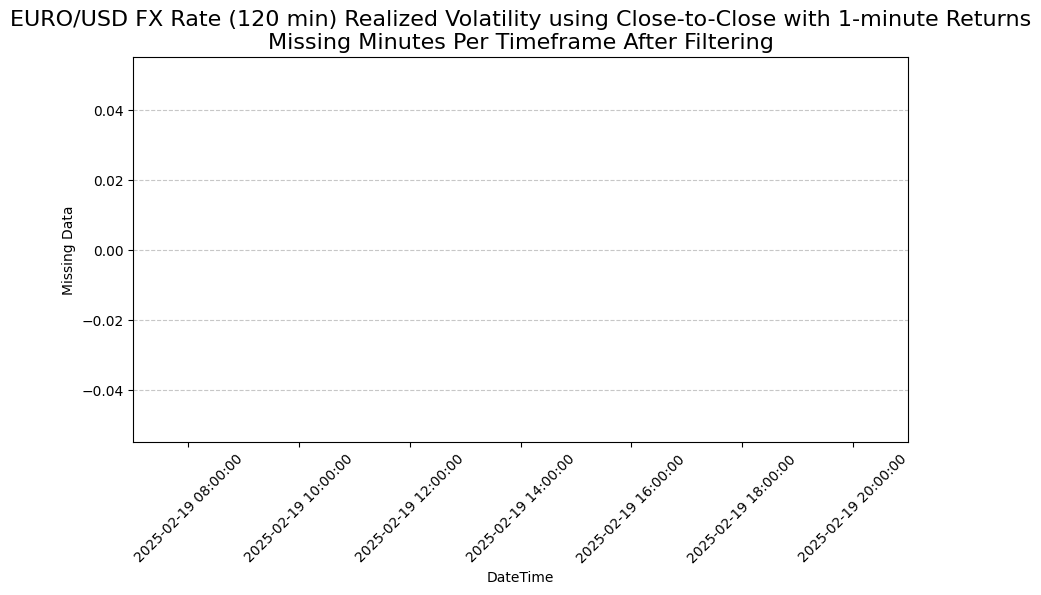

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


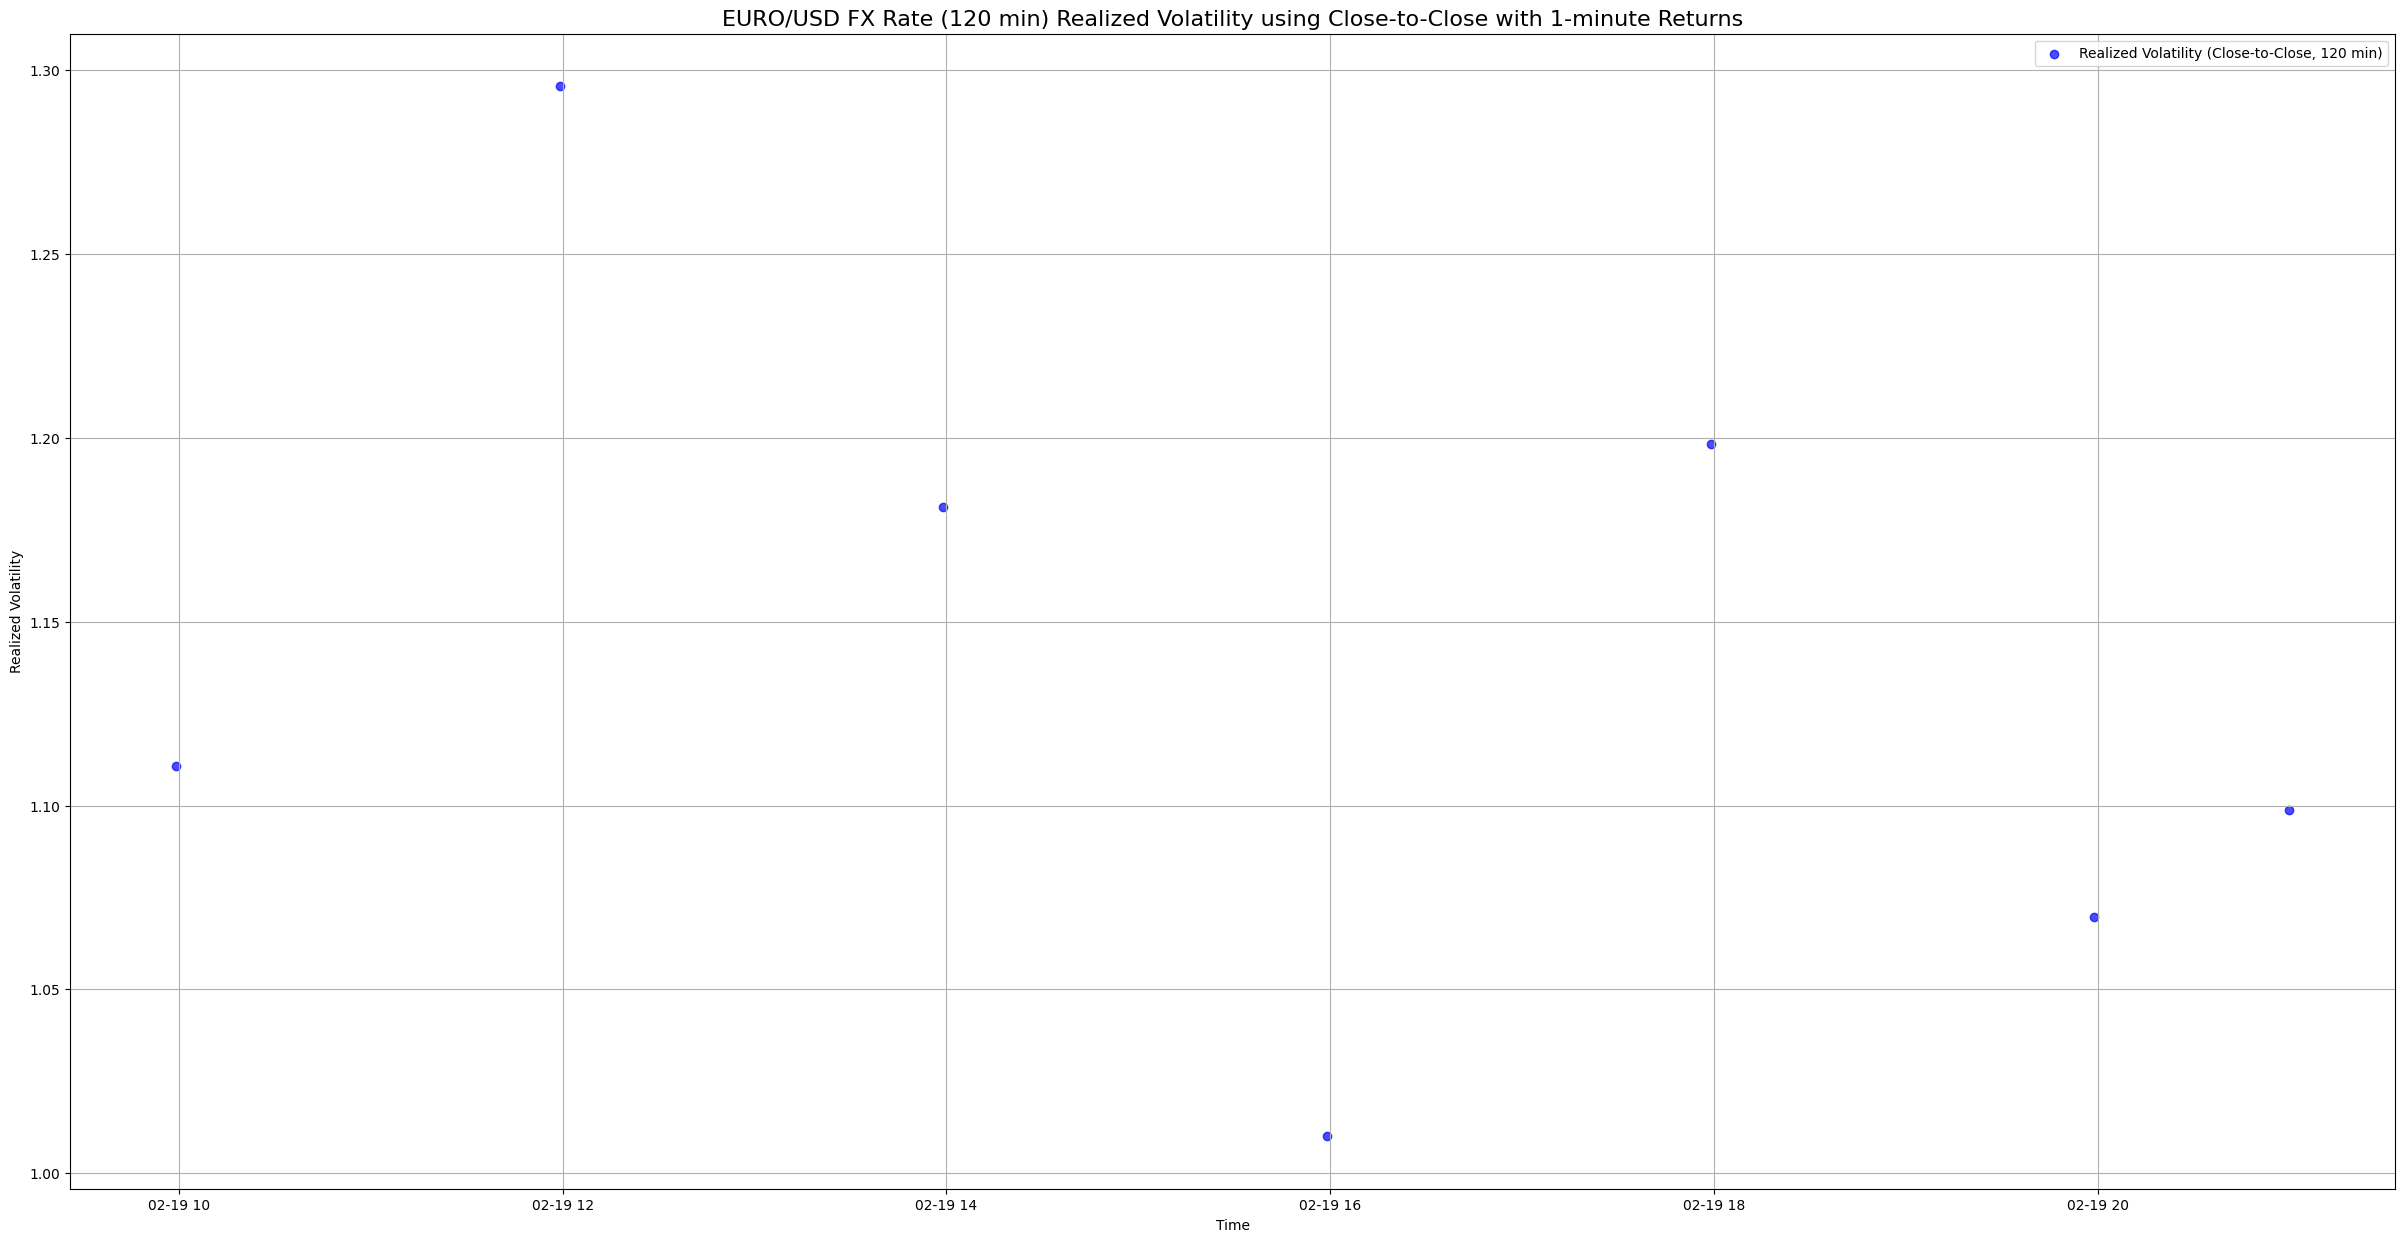

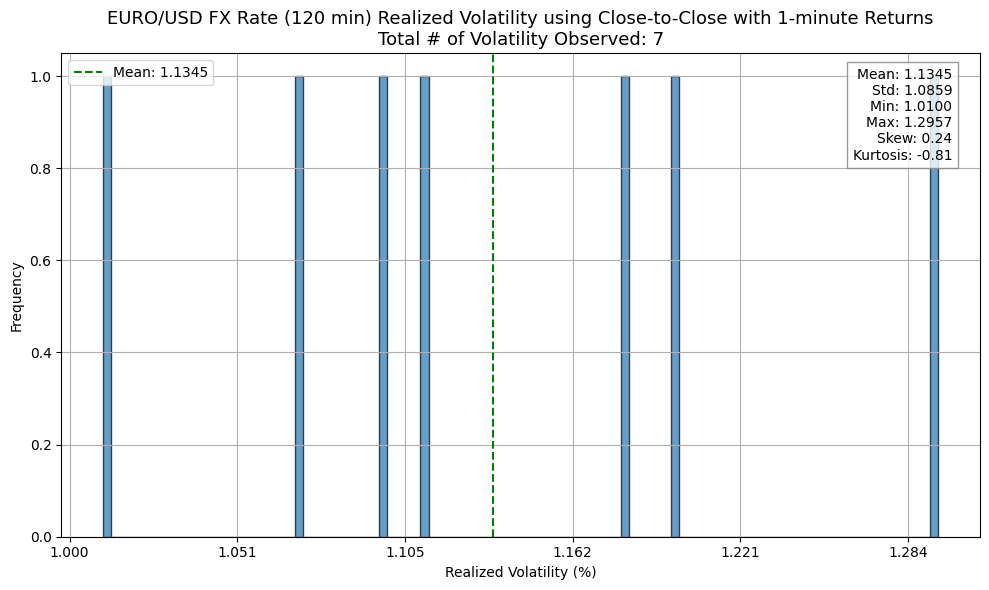

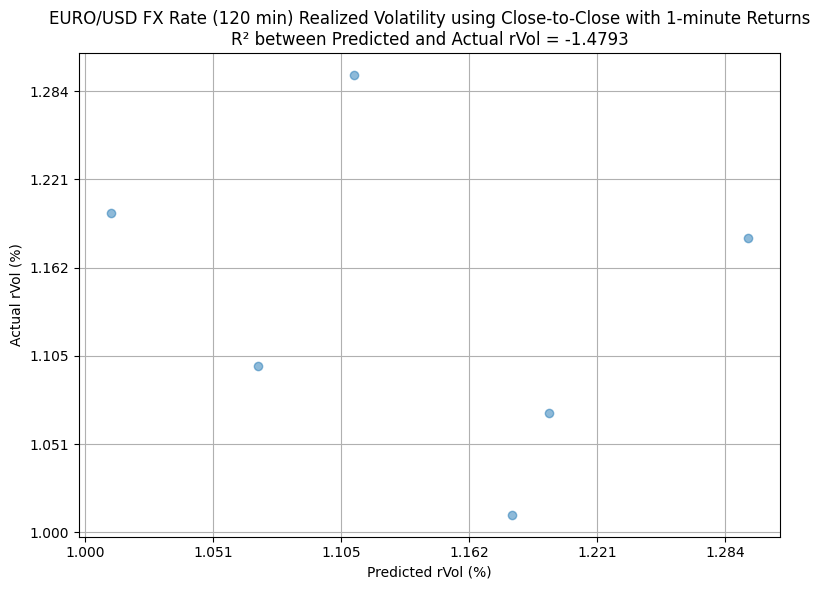

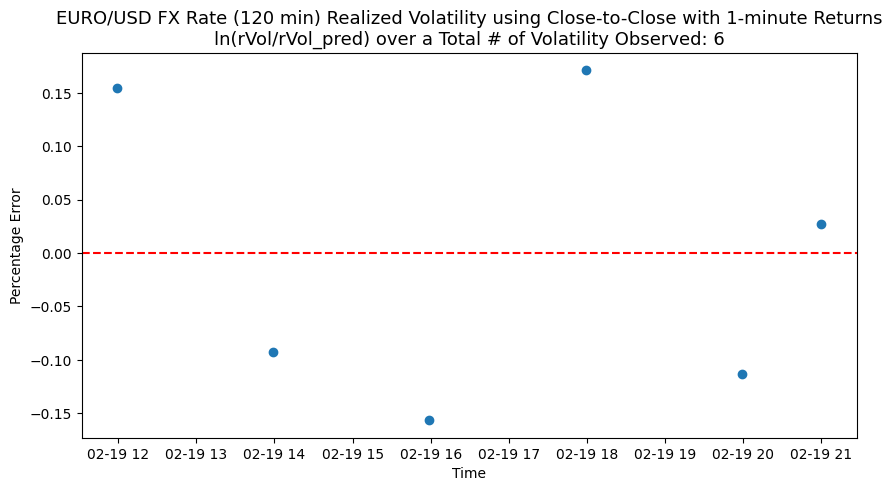

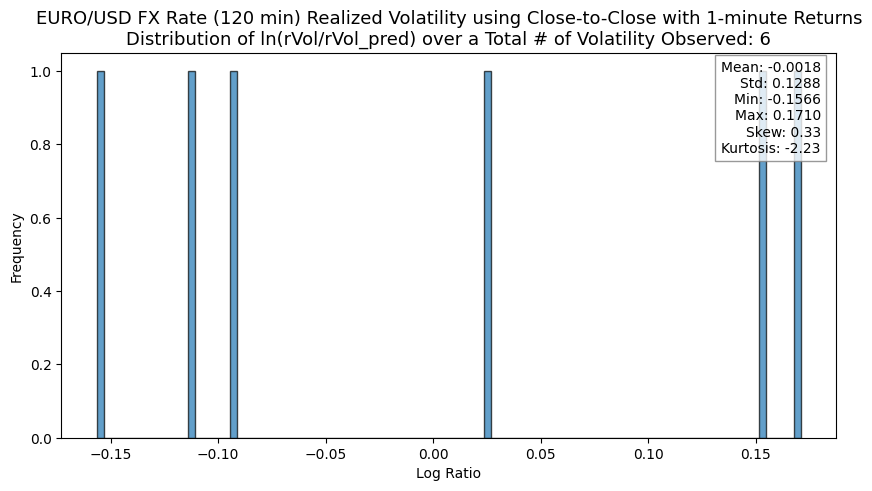

In [426]:
CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [427]:
CC_120m_rvol_mid_ohlc

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Close-to-Close
EndDateTime,,,,,,,,,,
2025-02-19 09:59:00,2025-02-19 08:00:00,2025-02-19 08:00:00,609.620921,610.467443,607.740068,607.947937,0,0,118.0,1.110820
2025-02-19 11:59:00,2025-02-19 10:00:00,2025-02-19 10:00:00,607.944677,608.213899,606.462187,607.811917,0,0,118.0,1.295689
2025-02-19 13:59:00,2025-02-19 12:00:00,2025-02-19 12:00:00,607.804411,608.523004,607.118524,608.017532,0,0,118.0,1.181268
2025-02-19 15:59:00,2025-02-19 14:00:00,2025-02-19 14:00:00,608.029889,609.237044,607.935626,608.605703,0,0,118.0,1.010047
2025-02-19 17:59:00,2025-02-19 16:00:00,2025-02-19 16:00:00,608.613320,610.429396,608.458203,610.007987,0,0,118.0,1.198444
2025-02-19 19:59:00,2025-02-19 18:00:00,2025-02-19 18:00:00,610.000437,611.040874,609.742204,610.933327,0,0,118.0,1.069798
2025-02-19 21:00:00,2025-02-19 20:00:00,2025-02-19 20:00:00,610.933539,611.136012,610.006565,610.146115,0,0,59.0,1.098816


In [428]:
'''# 3) Compute sample variance per group: sum(V) / (n - 1)
    grp_stats = df.groupby('group_id')['V']\
                  .agg(['sum', 'count'])
    
    # Adjust for groups with insufficient data
    grp_stats['var'] = np.where(
        grp_stats['count'] > 1, 
        grp_stats['sum'] / (grp_stats['count'] - 1), 
        np.nan
    )
    
    # 4) Take square root → realized volatility per group
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    
    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60 / timeframe)
    
    # 5) Broadcast that single vol back onto every row
    df[col_name] = df['group_id'].map(annualized_rvol)'''

"# 3) Compute sample variance per group: sum(V) / (n - 1)\n    grp_stats = df.groupby('group_id')['V']                  .agg(['sum', 'count'])\n    \n    # Adjust for groups with insufficient data\n    grp_stats['var'] = np.where(\n        grp_stats['count'] > 1, \n        grp_stats['sum'] / (grp_stats['count'] - 1), \n        np.nan\n    )\n    \n    # 4) Take square root → realized volatility per group\n    col_name = f'RVol_{timeframe}min_{vol_measure}'\n    rvol_per_group = np.sqrt(grp_stats['var'])\n    \n    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60 / timeframe)\n    \n    # 5) Broadcast that single vol back onto every row\n    df[col_name] = df['group_id'].map(annualized_rvol)"

In [429]:
'''
    elif vol_measure == 'Rogers-Satchell':
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['High'] / ohlc_data['Close']) +
                        np.log(ohlc_data['Low'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['Low'] / ohlc_data['Close']))'''

"\n    elif vol_measure == 'Rogers-Satchell':\n        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * \n                        np.log(ohlc_data['High'] / ohlc_data['Close']) +\n                        np.log(ohlc_data['Low'] / ohlc_data['Open']) * \n                        np.log(ohlc_data['Low'] / ohlc_data['Close']))"

In [430]:
'''elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = np.nan

        for i in range(1, len(ohlc_data)):
            j = i - 1
            steps = 0
            # Walk backward up to 5 bars looking for a non-NaN close
            while j >= 0 and np.isnan(ohlc_data['Close'].iat[j]) and steps < 5:
                j -= 1
                steps += 1

            if j >= 0 and not np.isnan(ohlc_data['Close'].iat[j]):
                # Found a valid close within 5 steps
                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Close'].iat[j]
            else:
                # Either ran out of history or looked back >5, so use this bar's Open
                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Open'].iat[i]

        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )'''

"elif vol_measure == 'Rogers-Satchell':\n        # Create a 'Prev_Close' column initialized with NaN\n        ohlc_data['Prev_Close'] = np.nan\n\n        for i in range(1, len(ohlc_data)):\n            j = i - 1\n            steps = 0\n            # Walk backward up to 5 bars looking for a non-NaN close\n            while j >= 0 and np.isnan(ohlc_data['Close'].iat[j]) and steps < 5:\n                j -= 1\n                steps += 1\n\n            if j >= 0 and not np.isnan(ohlc_data['Close'].iat[j]):\n                # Found a valid close within 5 steps\n                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Close'].iat[j]\n            else:\n                # Either ran out of history or looked back >5, so use this bar's Open\n                ohlc_data.at[i, 'Prev_Close'] = ohlc_data['Open'].iat[i]\n\n        # Now compute Rogers–Satchell using Prev_Close (as before)\n        ohlc_data['V'] = (\n            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *\n            np.l

In [431]:
#disregard this part, it is not used in the code

'''elif vol_measure == 'Rogers-Satchell':
        # Create a 'Prev_Close' column initialized with NaN
        ohlc_data['Prev_Close'] = np.nan 
        
        

        # Iterate over the data and fill 'Prev_Close' with the previous available non-NaN close
        for i in range(1, len(ohlc_data)):
            if np.isnan(ohlc_data['Prev_Close'].iloc[i]):
                # Start from the current row and move backward to find the previous non-NaN close
                j = i - 1
                while j >= 0 and np.isnan(ohlc_data['Close'].iloc[j]):
                    j -= 1
                
                # If a valid previous close is found, update the Prev_Close column
                if j >= 0:
                    ohlc_data['Prev_Close'].iloc[i] = ohlc_data['Close'].iloc[j]

        # Now apply the Rogers-Satchell volatility calculation with the updated 'Prev_Close'
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Prev_Close']) *
                        np.log(ohlc_data['High'] / ohlc_data['Close']) +
                        np.log(ohlc_data['Low'] / ohlc_data['Prev_Close']) *
                        np.log(ohlc_data['Low'] / ohlc_data['Close']))'''

"elif vol_measure == 'Rogers-Satchell':\n        # Create a 'Prev_Close' column initialized with NaN\n        ohlc_data['Prev_Close'] = np.nan \n        \n        \n\n        # Iterate over the data and fill 'Prev_Close' with the previous available non-NaN close\n        for i in range(1, len(ohlc_data)):\n            if np.isnan(ohlc_data['Prev_Close'].iloc[i]):\n                # Start from the current row and move backward to find the previous non-NaN close\n                j = i - 1\n                while j >= 0 and np.isnan(ohlc_data['Close'].iloc[j]):\n                    j -= 1\n                \n                # If a valid previous close is found, update the Prev_Close column\n                if j >= 0:\n                    ohlc_data['Prev_Close'].iloc[i] = ohlc_data['Close'].iloc[j]\n\n        # Now apply the Rogers-Satchell volatility calculation with the updated 'Prev_Close'\n        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Prev_Close']) *\n                  

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")


Original data shape: (525599, 8)
Threshold value: 0.1 (12.0 points)
Filtered data shape: (351299, 8)
timeframes removed: 1453
Total timeframes: 4381


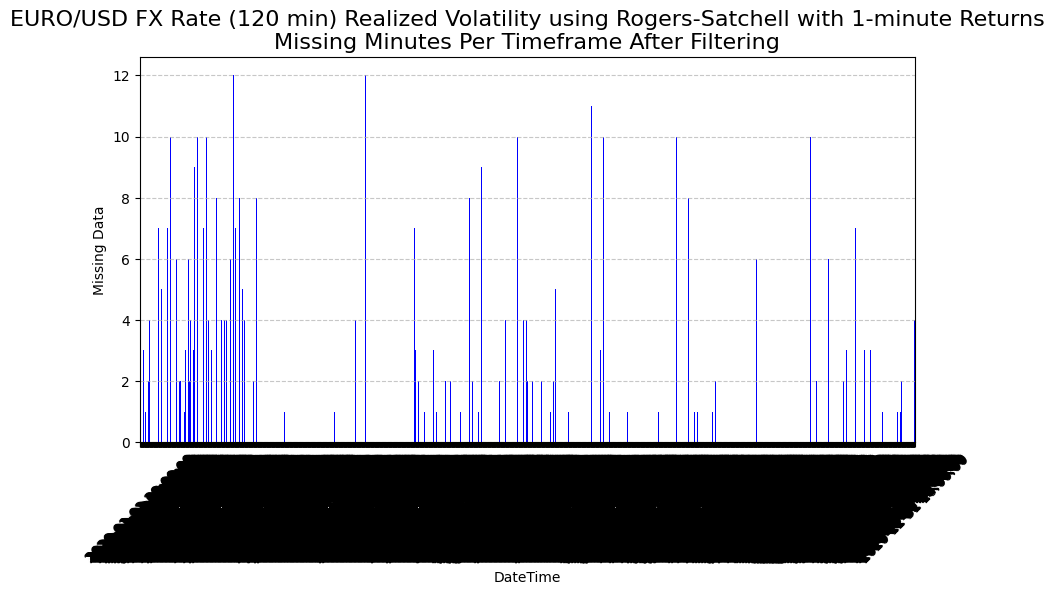

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


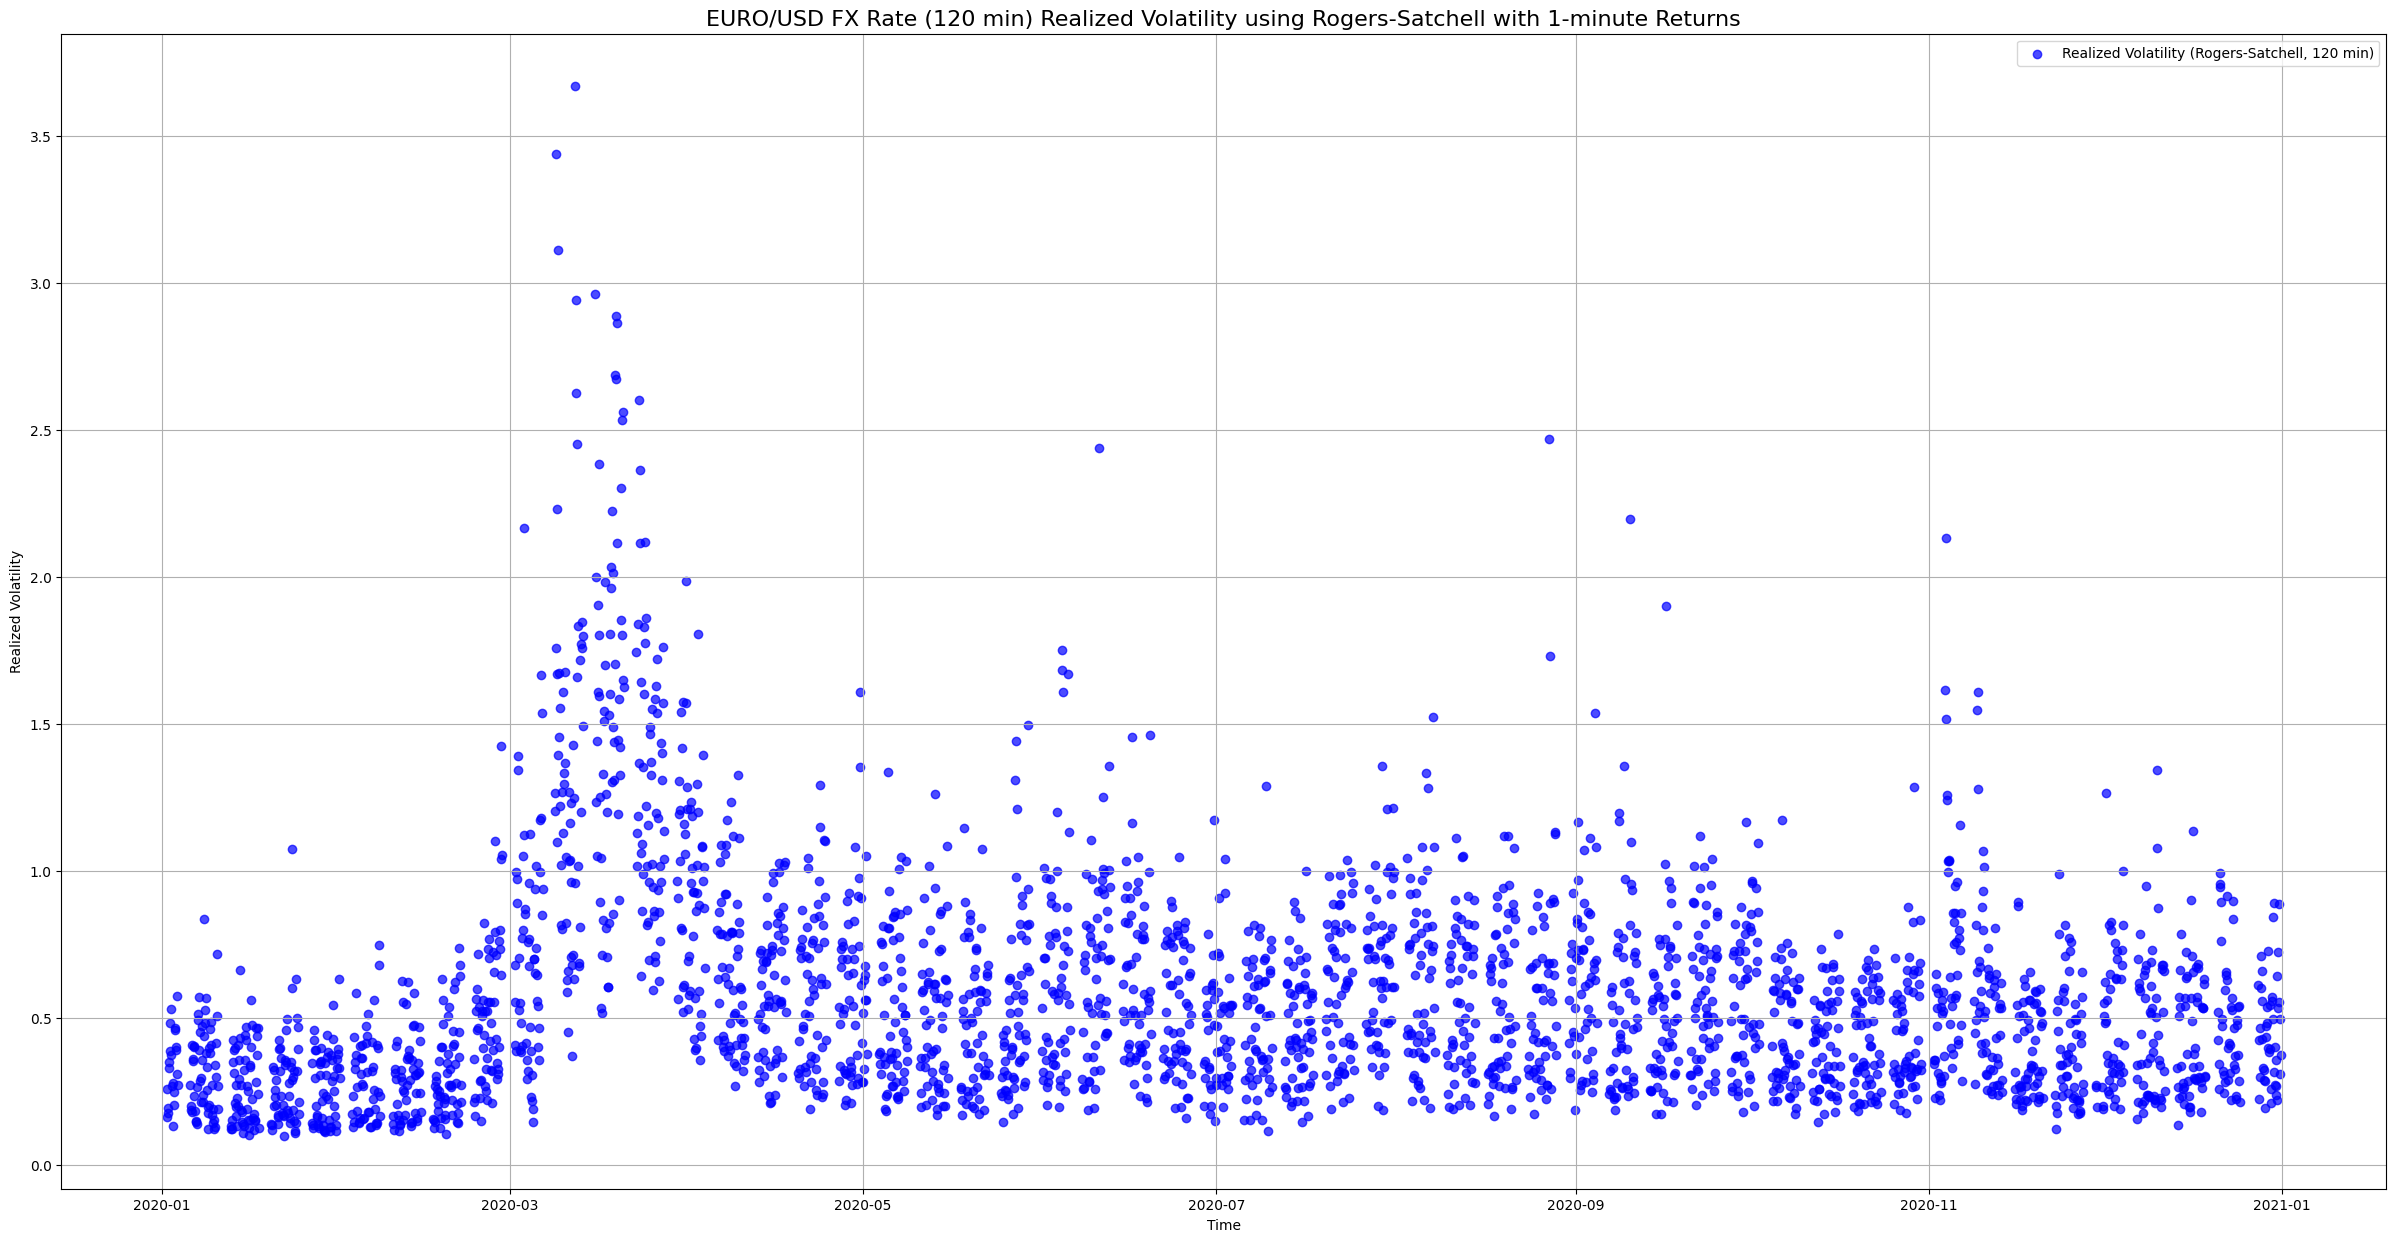

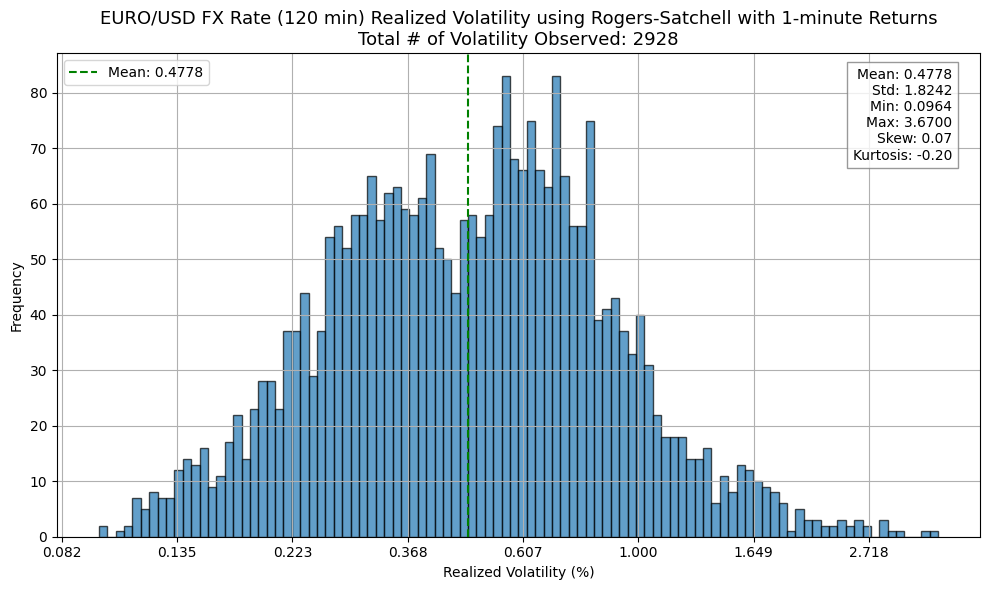

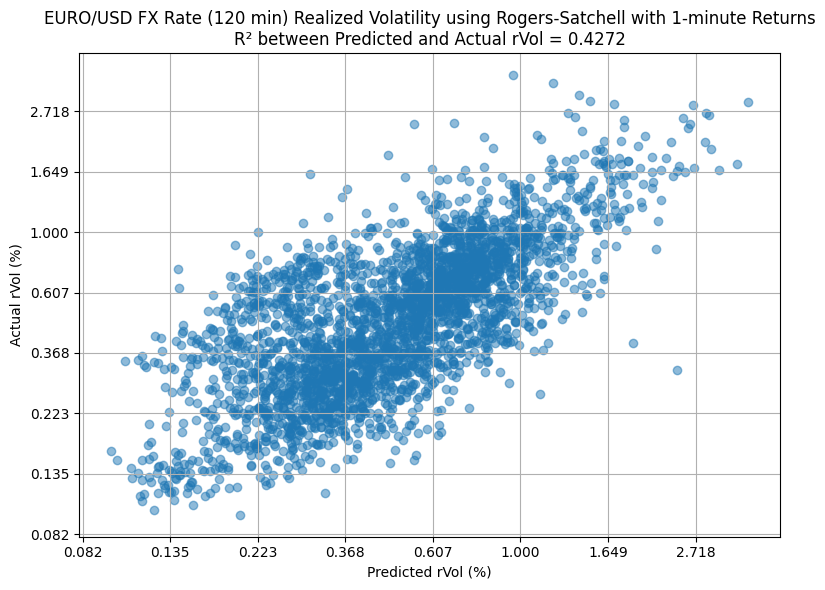

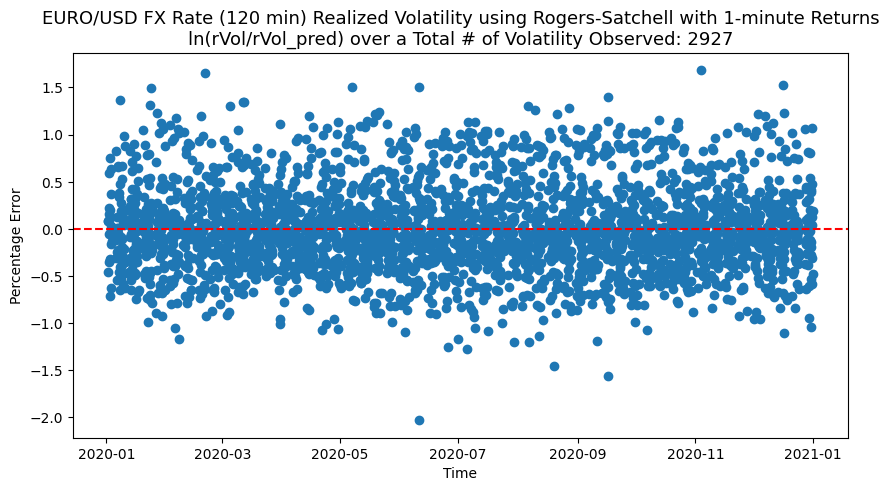

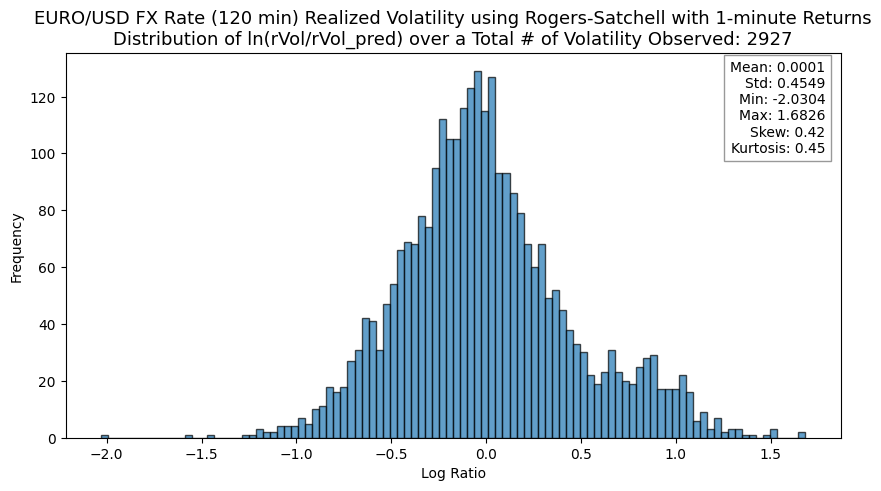

In [432]:
RS_120m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'


In [433]:
RS_120m_rvol.head(20)

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
EndDateTime,,,,,,,,,,
2020-01-01 19:59:00,2020-01-01 18:00:00,2020-01-01 18:00:00,1.12143,1.12218,1.12142,1.12183,0.0,7.0,105.0,0.257993
2020-01-01 21:59:00,2020-01-01 20:00:00,2020-01-01 20:00:00,1.12182,1.12245,1.12180,1.12222,0.0,3.0,113.0,0.162925
2020-01-01 23:59:00,2020-01-01 22:00:00,2020-01-01 22:00:00,1.12224,1.12231,1.12008,1.12012,0.0,0.0,118.0,0.176953
2020-01-02 01:59:00,2020-01-02 00:00:00,2020-01-02 00:00:00,1.12011,1.12077,1.12009,1.12077,0.0,0.0,118.0,0.193120
2020-01-02 03:59:00,2020-01-02 02:00:00,2020-01-02 02:00:00,1.12078,1.12137,1.12043,1.12120,0.0,0.0,118.0,0.348122
2020-01-02 05:59:00,2020-01-02 04:00:00,2020-01-02 04:00:00,1.12119,1.12141,1.11927,1.11982,0.0,0.0,118.0,0.328888
2020-01-02 07:59:00,2020-01-02 06:00:00,2020-01-02 06:00:00,1.11984,1.12021,1.11829,1.11930,0.0,0.0,118.0,0.385009
2020-01-02 09:59:00,2020-01-02 08:00:00,2020-01-02 08:00:00,1.11929,1.11970,1.11700,1.11741,0.0,0.0,118.0,0.482556
2020-01-02 11:59:00,2020-01-02 10:00:00,2020-01-02 10:00:00,1.11739,1.12030,1.11651,1.11661,0.0,0.0,118.0,0.529326


In [434]:
RS_120m_rvol.describe()

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
count,2928,2928,2928.000000,2928.000000,2928.000000,2928.000000,2928.0,2928.000000,2928.000000,2928.000000
mean,2020-06-30 21:49:20.655737600,2020-06-30 21:49:20.655737600,1.141004,1.142179,1.139873,1.141040,0.0,0.838115,116.538934,0.573338
min,2020-01-01 18:00:00,2020-01-01 18:00:00,1.065460,1.067380,1.063750,1.065420,0.0,0.000000,55.000000,0.096396
25%,2020-04-01 09:30:00,2020-04-01 09:30:00,1.100005,1.101043,1.098715,1.099995,0.0,0.000000,118.000000,0.309169
50%,2020-06-29 23:00:00,2020-06-29 23:00:00,1.131605,1.132905,1.130235,1.131605,0.0,0.000000,118.000000,0.488049
75%,2020-09-29 15:00:00,2020-09-29 15:00:00,1.181433,1.182472,1.180290,1.181460,0.0,0.000000,118.000000,0.726950
max,2020-12-31 16:00:00,2020-12-31 16:00:00,1.230640,1.231010,1.229480,1.230650,0.0,12.000000,118.000000,3.669963
std,NaN,NaN,0.044292,0.044252,0.044348,0.044314,0.0,2.237616,3.941040,0.382377


C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")


Original data shape: (525599, 8)
Threshold value: 0.1 (72.0 points)
Filtered data shape: (334799, 8)
timeframes removed: 265
Total timeframes: 731


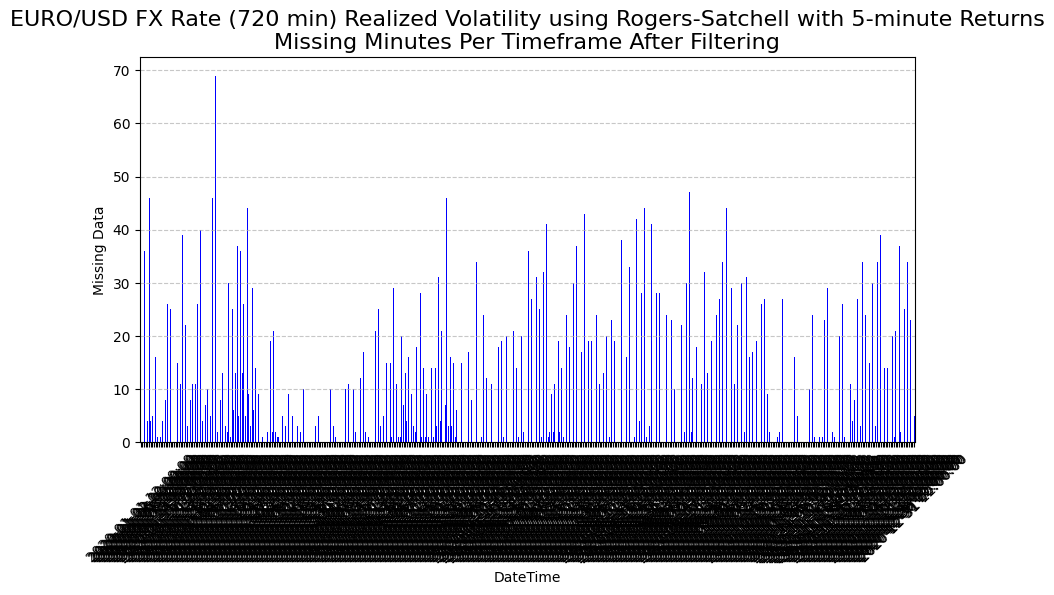

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


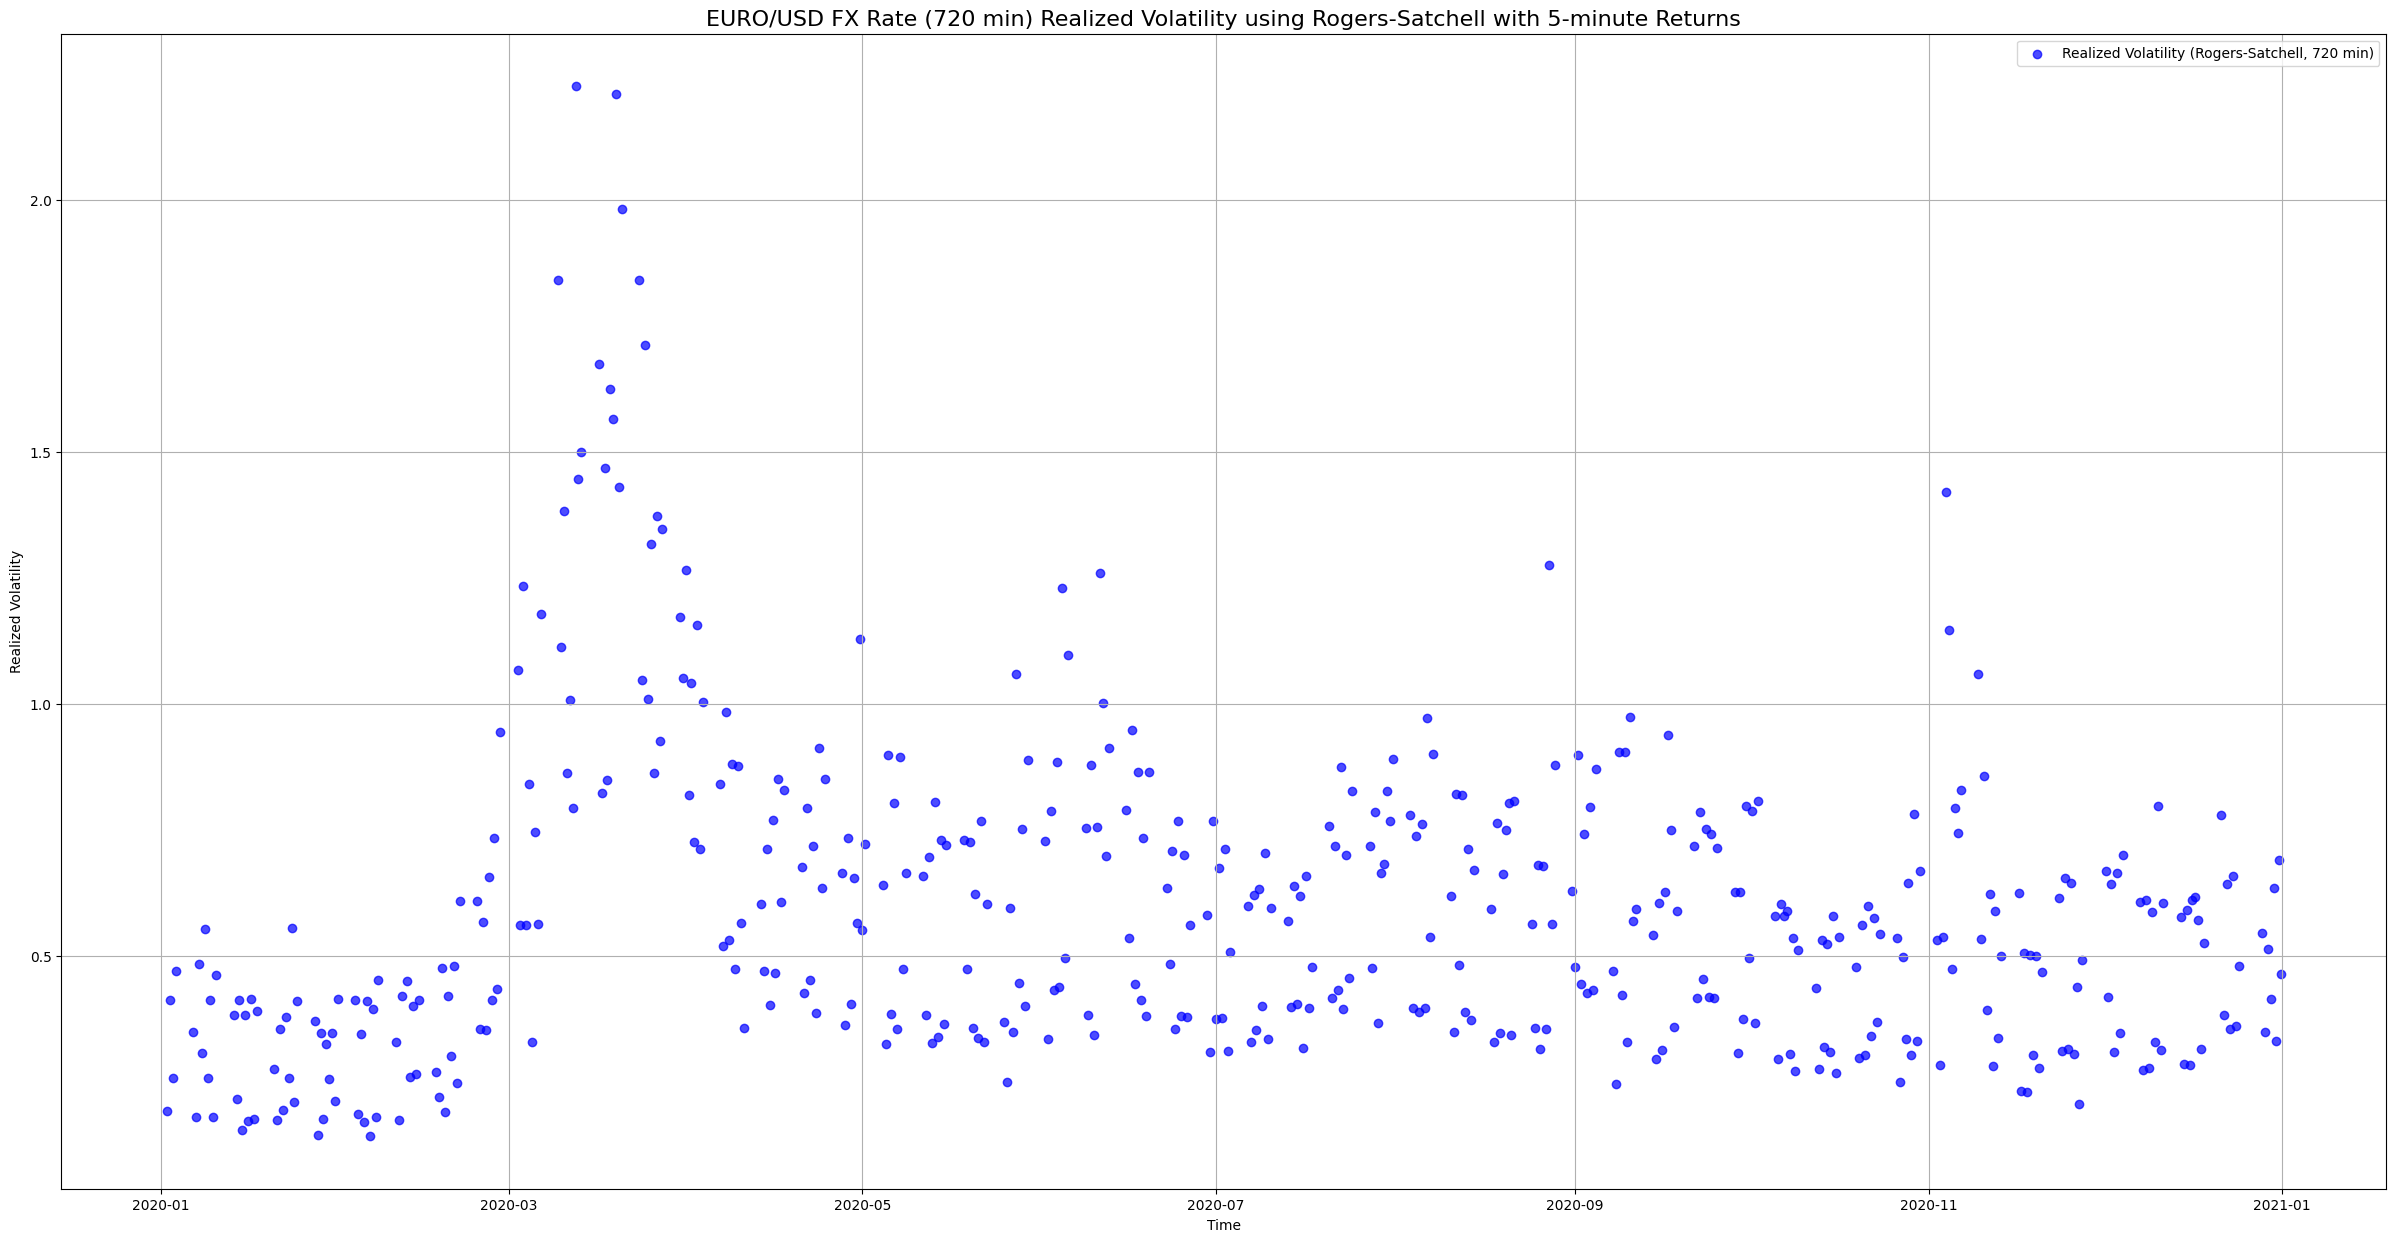

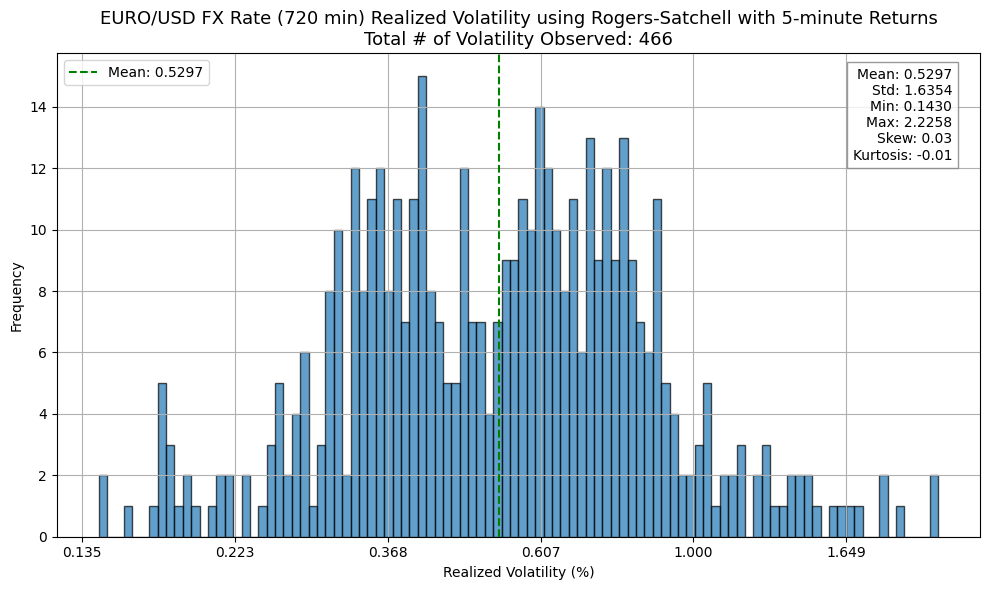

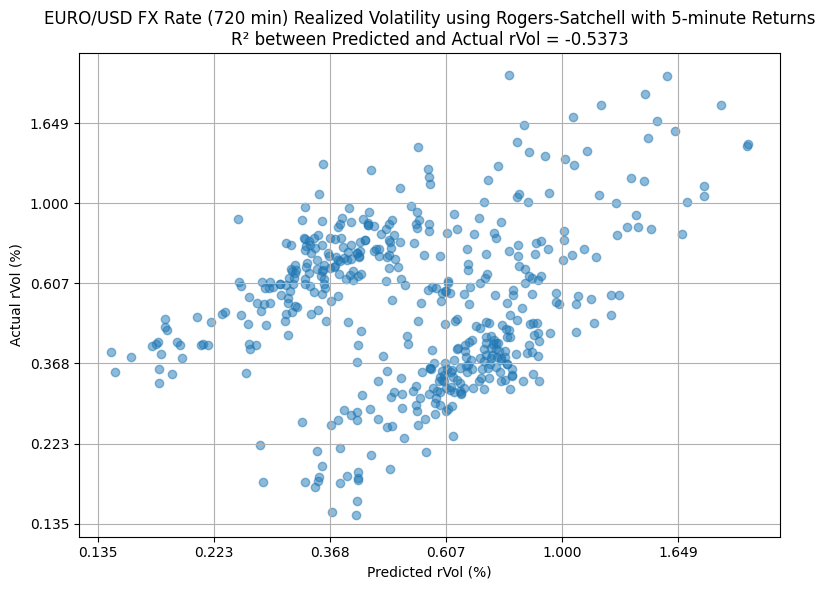

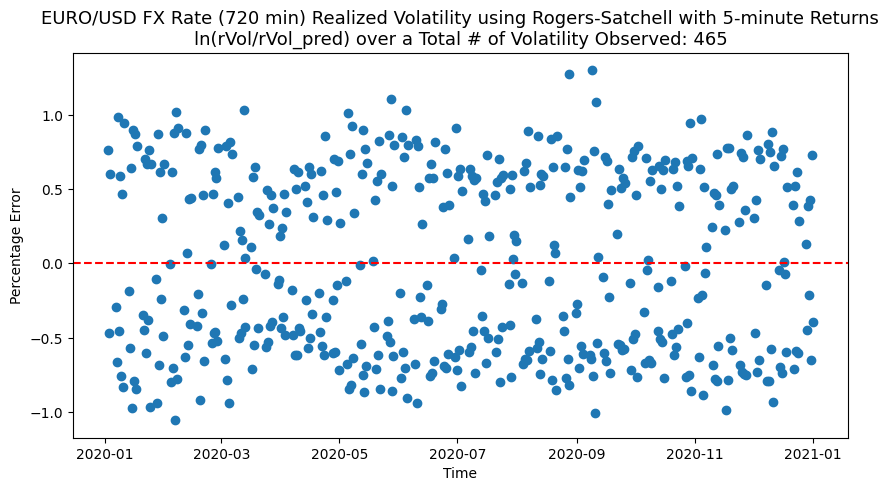

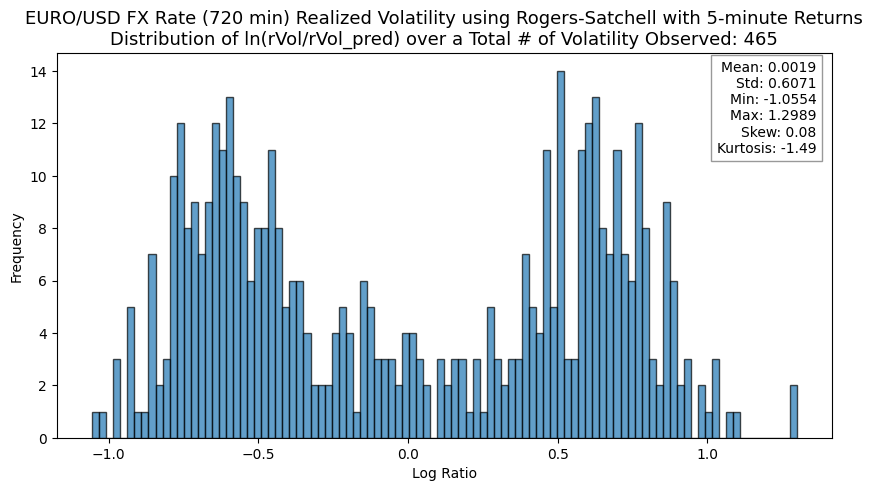

In [435]:

RS_720m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.1, vol_title= 'RVol_720min_Rogers-Satchell')  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [436]:
RS_720m_rvol.describe()

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_720min_Rogers-Satchell
count,466,466,466.000000,466.000000,466.000000,466.000000,466.0,466.000000,466.000000,466.000000
mean,2020-07-01 10:59:44.549356032,2020-07-01 11:04:48.412017152,1.141511,1.144553,1.138648,1.141623,0.0,10.693133,141.515021,0.597978
min,2020-01-01 12:00:00,2020-01-01 17:00:00,1.065520,1.076570,1.065270,1.065530,0.0,0.000000,58.000000,0.143015
25%,2020-04-01 15:00:00,2020-04-01 15:05:00,1.100800,1.103125,1.096475,1.100602,0.0,0.000000,142.000000,0.369891
50%,2020-07-01 06:00:00,2020-07-01 06:05:00,1.132395,1.136210,1.128315,1.132125,0.0,3.000000,142.000000,0.544787
75%,2020-09-29 21:00:00,2020-09-29 21:05:00,1.181278,1.183863,1.178700,1.181660,0.0,19.000000,142.000000,0.743998
max,2020-12-31 12:00:00,2020-12-31 12:05:00,1.228620,1.231010,1.227620,1.228640,0.0,69.000000,143.000000,2.225752
std,NaN,NaN,0.044247,0.044178,0.044400,0.044404,0.0,13.674175,4.846547,0.315214


C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")


Original data shape: (525599, 8)
Threshold value: 0.1 (288.0 points)
Filtered data shape: (223199, 8)
timeframes removed: 105
Total timeframes: 183


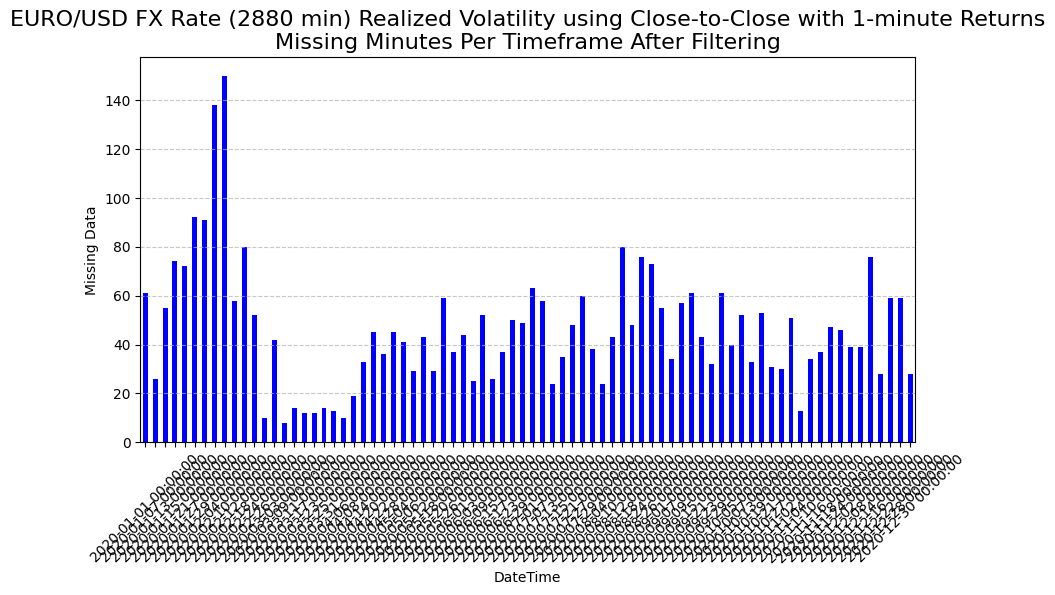

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


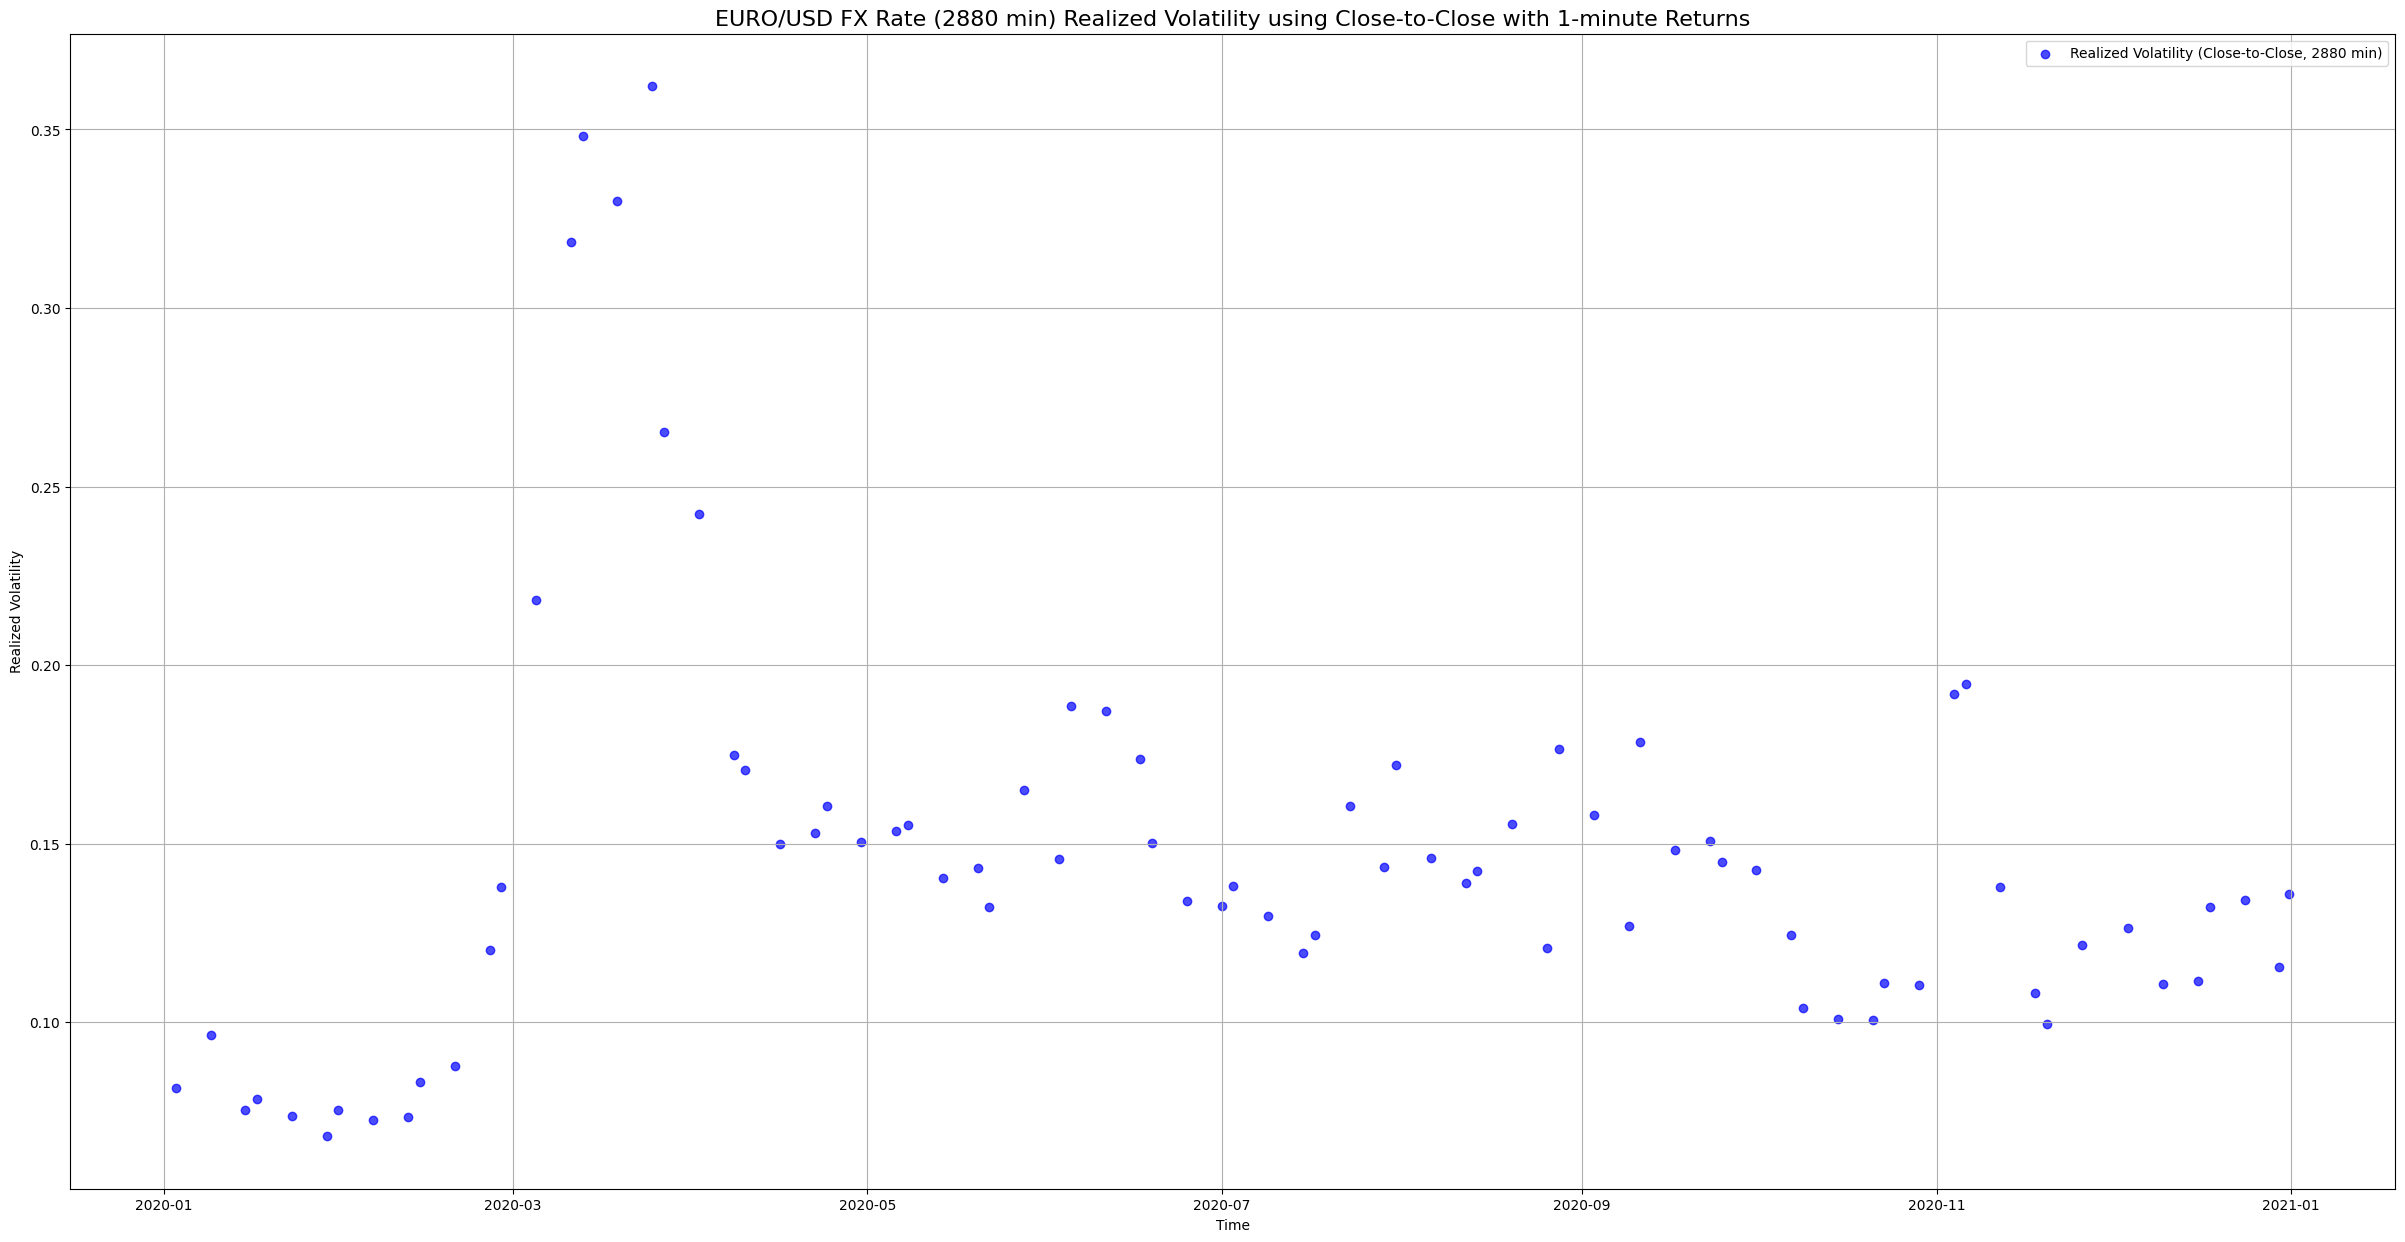

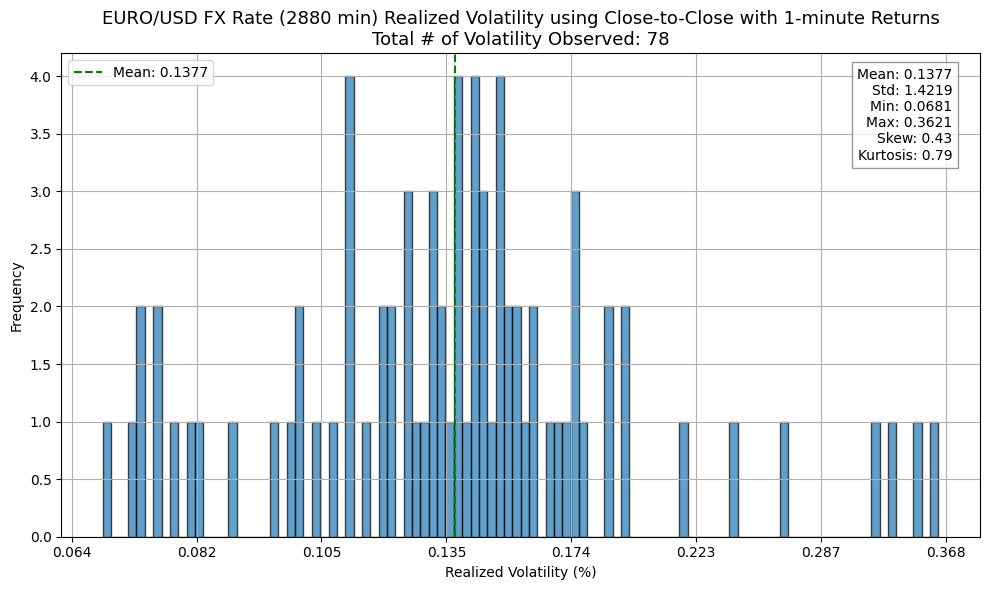

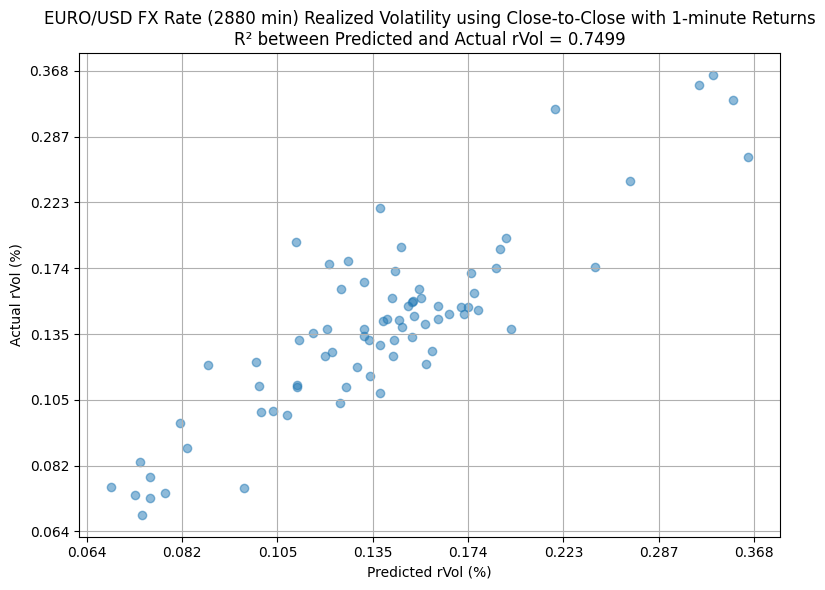

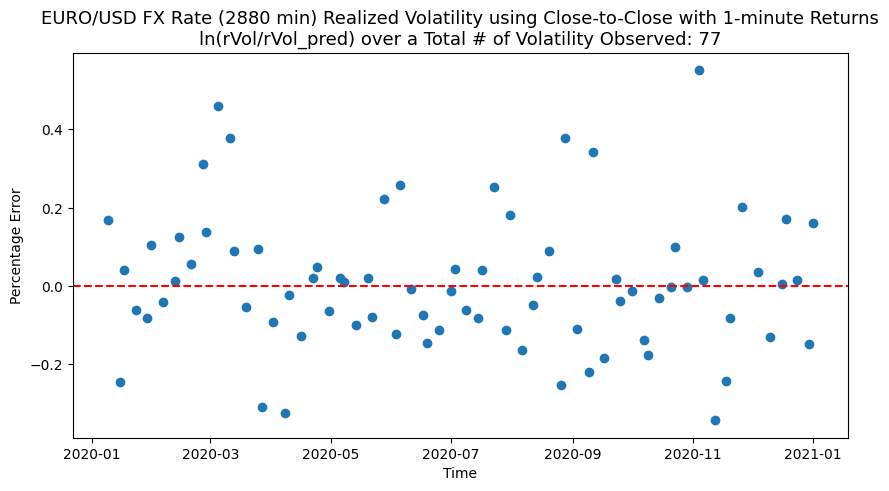

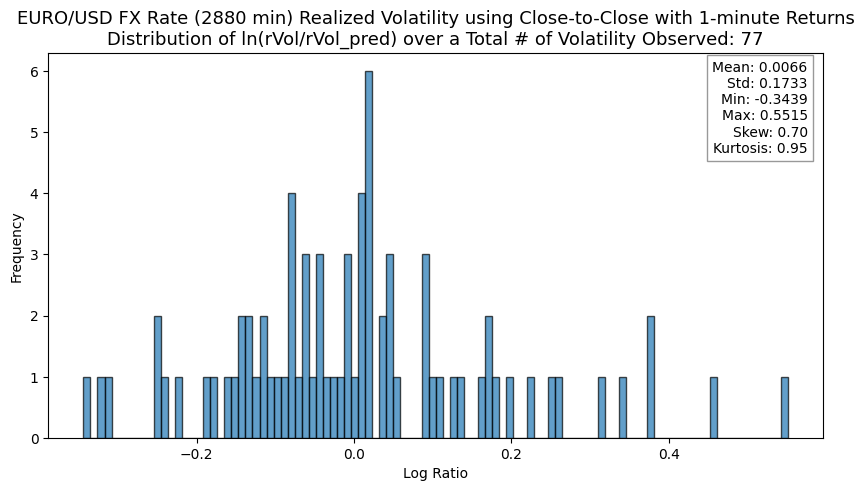

In [437]:
rvol_2880m_cc = calculate_rvol(data, vol_measure='Close-to-Close', timeframe=2880, minute_interval= 1, threshold=0.1, vol_title= 'RVol_2880min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:54: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data['group_id'] = ohlc_data.index.floor(f"{timeframe}T")


Original data shape: (525599, 8)
Threshold value: 0.1 (288.0 points)
Filtered data shape: (223199, 8)
timeframes removed: 105
Total timeframes: 183


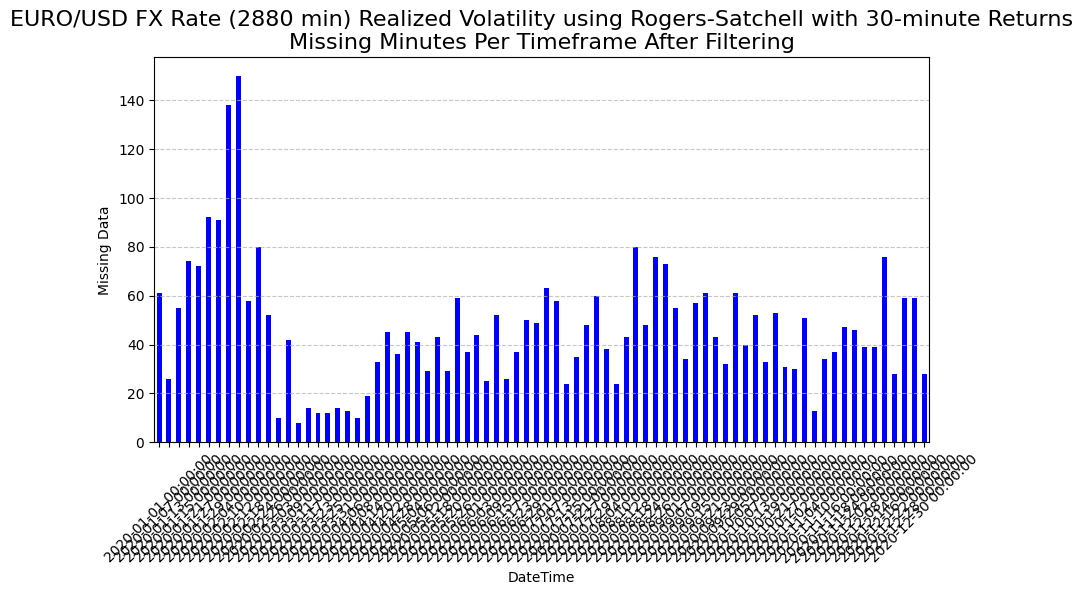

C:\Users\estifo\AppData\Local\Temp\ipykernel_3516\1995299881.py:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


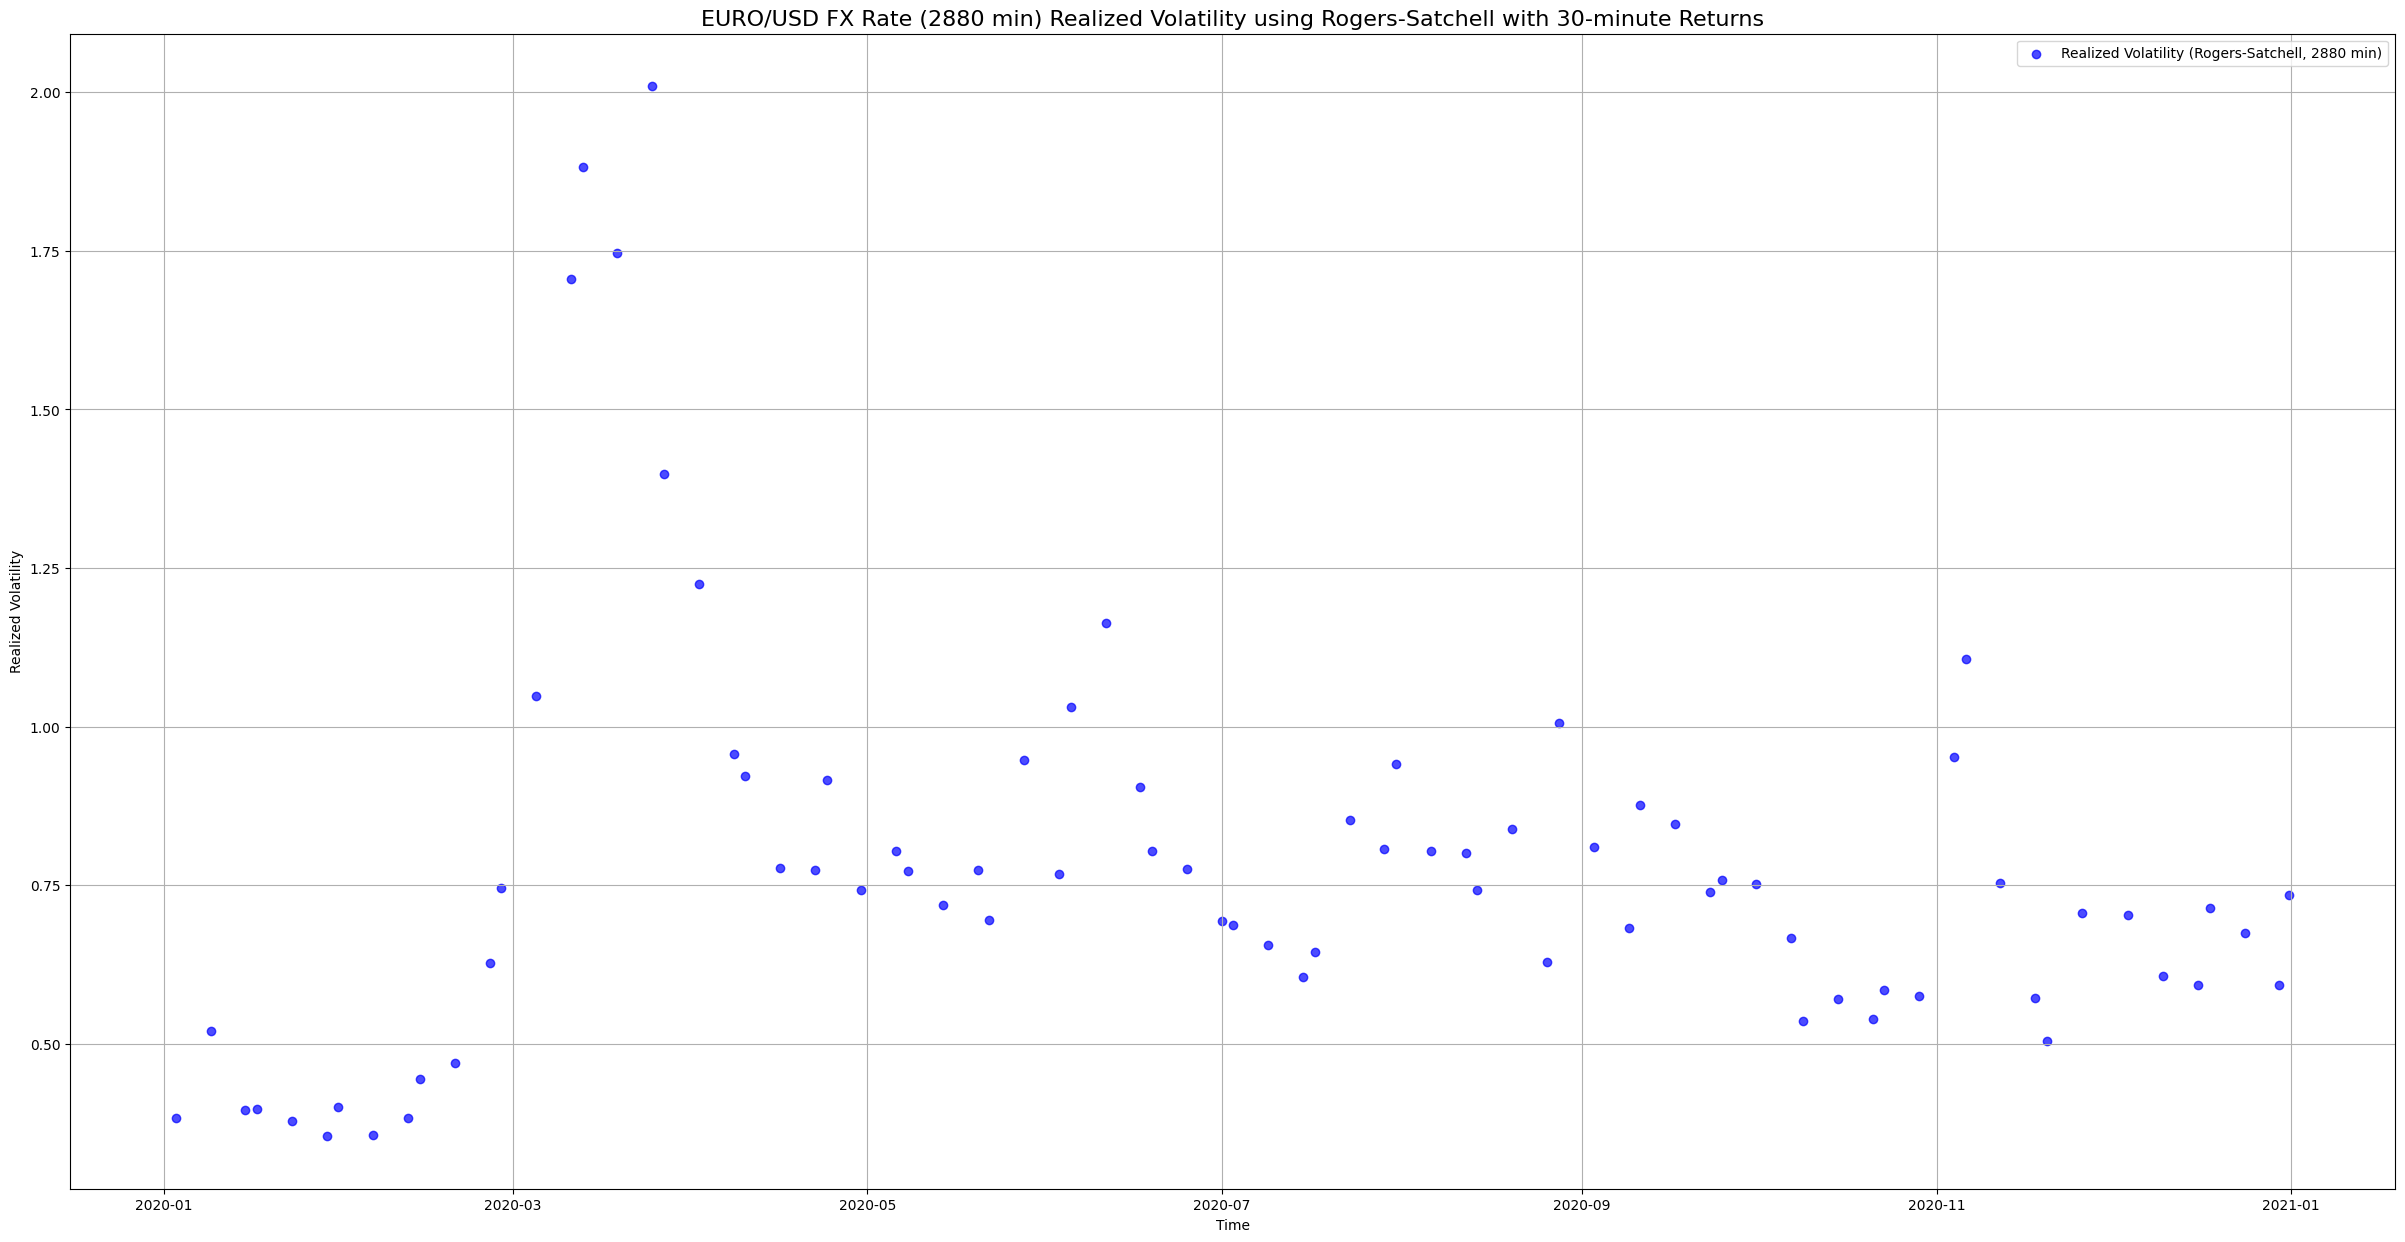

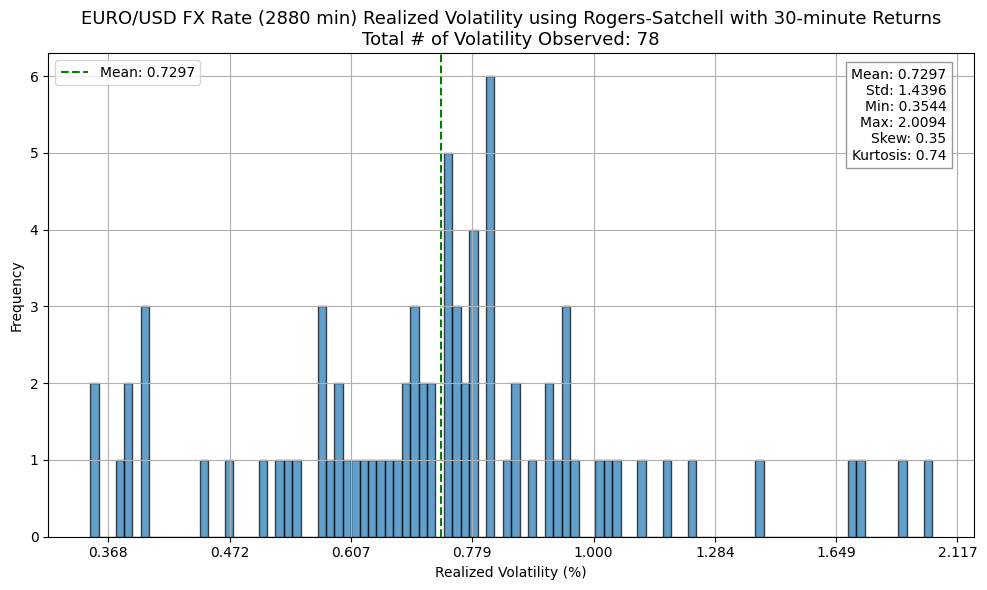

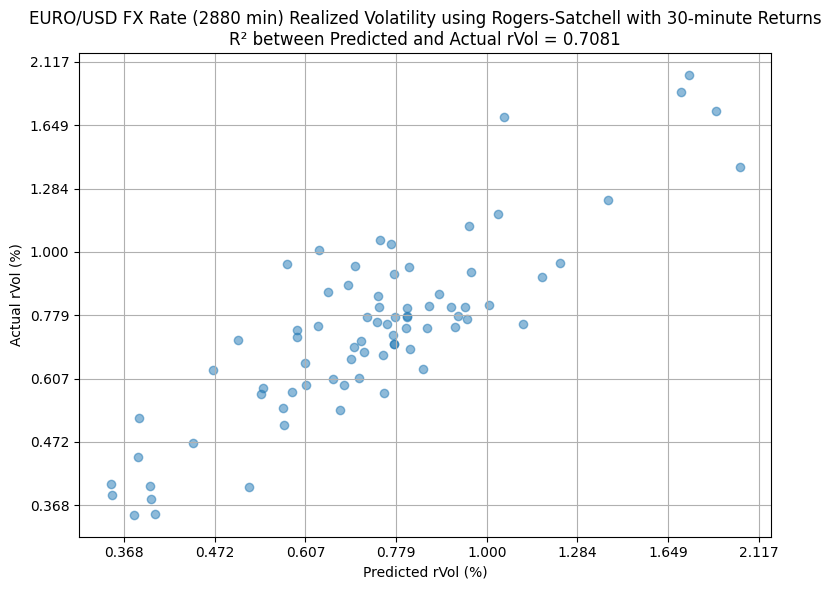

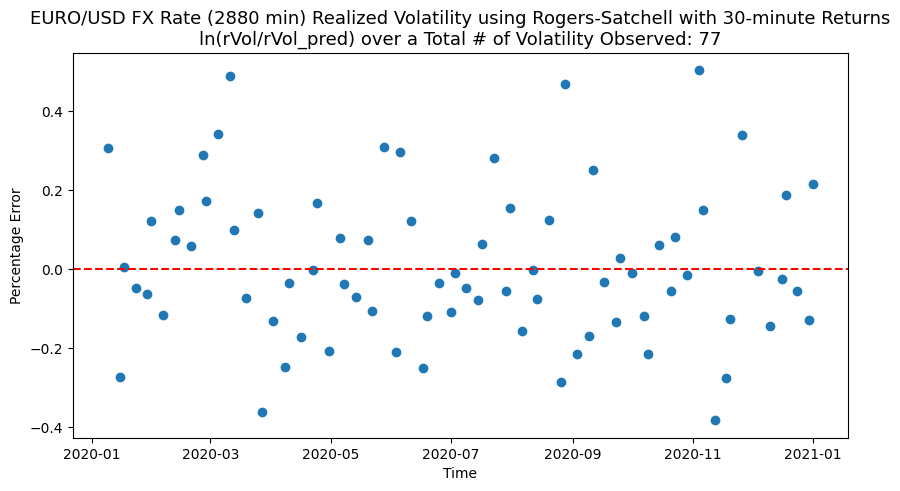

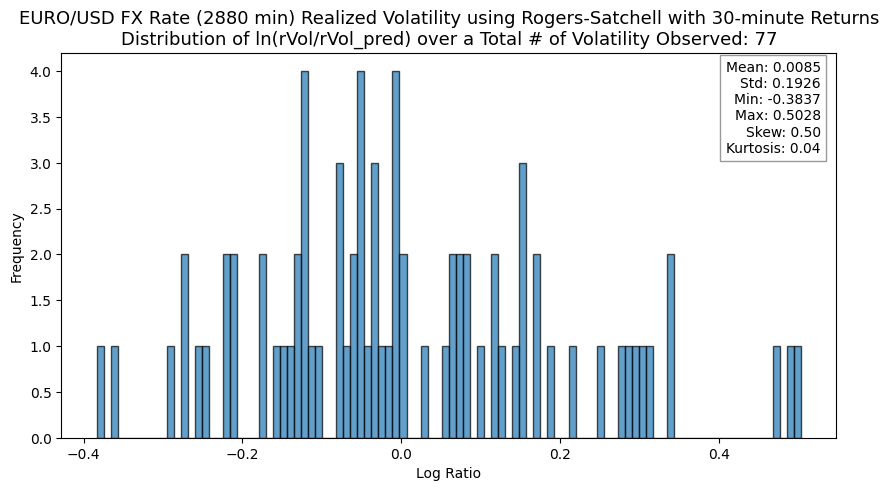

In [438]:
rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.1, vol_title= 'RVol_2880min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [439]:
rvol_2880m_rs['RVol_2880min_Rogers-Satchell'].describe()

count    78.000000
mean      0.781757
std       0.321135
min       0.354410
25%       0.595918
50%       0.742261
75%       0.851442
max       2.009376
Name: RVol_2880min_Rogers-Satchell, dtype: float64

In [442]:
def average_dist_pred_rvol(data):
    # compute group_id[i] - group_id[i-1] for all i, drop the NaN at the start
    diffs = data['group_id'].diff().iloc[1:]
    return diffs.mean()

In [444]:
RS_120m_rvol#.head(20)

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_120min_Rogers-Satchell
EndDateTime,,,,,,,,,,
2020-01-01 19:59:00,2020-01-01 18:00:00,2020-01-01 18:00:00,1.12143,1.12218,1.12142,1.12183,0.0,7.0,105.0,0.257993
2020-01-01 21:59:00,2020-01-01 20:00:00,2020-01-01 20:00:00,1.12182,1.12245,1.12180,1.12222,0.0,3.0,113.0,0.162925
2020-01-01 23:59:00,2020-01-01 22:00:00,2020-01-01 22:00:00,1.12224,1.12231,1.12008,1.12012,0.0,0.0,118.0,0.176953
2020-01-02 01:59:00,2020-01-02 00:00:00,2020-01-02 00:00:00,1.12011,1.12077,1.12009,1.12077,0.0,0.0,118.0,0.193120
2020-01-02 03:59:00,2020-01-02 02:00:00,2020-01-02 02:00:00,1.12078,1.12137,1.12043,1.12120,0.0,0.0,118.0,0.348122
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 09:59:00,2020-12-31 08:00:00,2020-12-31 08:00:00,1.22716,1.22870,1.22640,1.22692,0.0,0.0,118.0,0.552712
2020-12-31 11:59:00,2020-12-31 10:00:00,2020-12-31 10:00:00,1.22692,1.22704,1.22208,1.22299,0.0,0.0,118.0,0.886455
2020-12-31 13:59:00,2020-12-31 12:00:00,2020-12-31 12:00:00,1.22298,1.22346,1.22149,1.22166,0.0,0.0,118.0,0.494041


In [445]:
RS_120m_rvol['group_id'].describe()

count                             2928
mean     2020-06-30 21:49:20.655737600
min                2020-01-01 18:00:00
25%                2020-04-01 09:30:00
50%                2020-06-29 23:00:00
75%                2020-09-29 15:00:00
max                2020-12-31 16:00:00
Name: group_id, dtype: object

In [446]:
average_dist_pred_rvol(RS_120m_rvol)

Timedelta('0 days 02:59:31.711650153')

In [447]:
RS_720m_rvol.dropna(inplace=True)
RS_720m_rvol.head(20)

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_720min_Rogers-Satchell
EndDateTime,,,,,,,,,,
2020-01-02 00:00:00,2020-01-01 12:00:00,2020-01-01 17:00:00,1.12120,1.12245,1.12008,1.12012,0.0,25.0,83.0,0.192805
2020-01-02 12:00:00,2020-01-02 00:00:00,2020-01-02 00:05:00,1.12012,1.12141,1.11649,1.11654,0.0,0.0,142.0,0.413508
2020-01-03 00:00:00,2020-01-02 12:00:00,2020-01-02 12:05:00,1.11656,1.11784,1.11635,1.11700,0.0,36.0,142.0,0.258277
2020-01-03 12:00:00,2020-01-03 00:00:00,2020-01-03 00:05:00,1.11701,1.11798,1.11249,1.11719,0.0,0.0,142.0,0.470555
2020-01-06 12:00:00,2020-01-06 00:00:00,2020-01-06 00:00:00,1.11644,1.12055,1.11571,1.11855,0.0,4.0,143.0,0.350401
2020-01-07 00:00:00,2020-01-06 12:00:00,2020-01-06 12:05:00,1.11855,1.11989,1.11842,1.11903,0.0,46.0,140.0,0.180487
2020-01-07 12:00:00,2020-01-07 00:00:00,2020-01-07 00:05:00,1.11903,1.11924,1.11335,1.11384,0.0,4.0,142.0,0.484115
2020-01-08 00:00:00,2020-01-07 12:00:00,2020-01-07 12:05:00,1.11383,1.11682,1.11378,1.11492,0.0,5.0,142.0,0.307217
2020-01-08 12:00:00,2020-01-08 00:00:00,2020-01-08 00:05:00,1.11491,1.11549,1.11087,1.11183,0.0,1.0,142.0,0.553947


<Axes: xlabel='EndDateTime'>

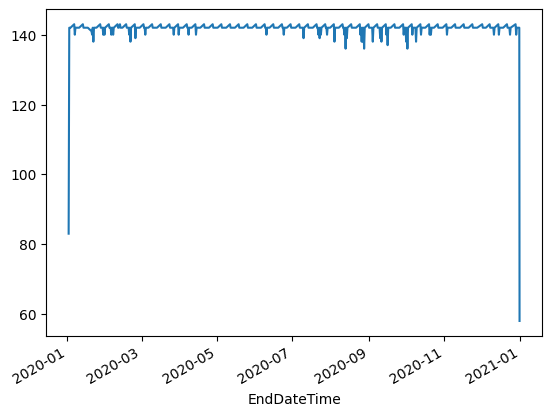

In [448]:
RS_720m_rvol['n_minus_1_mean'].plot()    # + RS_720m_rvol['indicator_sum']

In [449]:
RS_720m_rvol['group_id'].describe()

count                              466
mean     2020-07-01 10:59:44.549356032
min                2020-01-01 12:00:00
25%                2020-04-01 15:00:00
50%                2020-07-01 06:00:00
75%                2020-09-29 21:00:00
max                2020-12-31 12:00:00
Name: group_id, dtype: object

In [450]:
average_dist_pred_rvol(RS_720m_rvol)

Timedelta('0 days 18:50:19.354838709')

In [451]:
rvol_2880m_rs

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,n_minus_1_mean,RVol_2880min_Rogers-Satchell
EndDateTime,,,,,,,,,,
2020-01-03 00:00:00,2020-01-01,2020-01-01 17:00:00,1.12120,1.12245,1.11635,1.11700,0.0,61.0,61.0,0.383048
2020-01-09 00:00:00,2020-01-07,2020-01-07 00:00:00,1.11908,1.11924,1.11016,1.11154,0.0,26.0,95.0,0.519480
2020-01-15 00:00:00,2020-01-13,2020-01-13 00:00:00,1.11272,1.11469,1.11045,1.11325,0.0,55.0,95.0,0.395056
2020-01-17 00:00:00,2020-01-15,2020-01-15 00:30:00,1.11325,1.11727,1.11185,1.11319,0.0,74.0,94.0,0.396722
2020-01-23 00:00:00,2020-01-21,2020-01-21 00:00:00,1.10992,1.11179,1.10700,1.10852,0.0,72.0,95.0,0.377766
...,...,...,...,...,...,...,...,...,...,...
2020-12-16 00:00:00,2020-12-14,2020-12-14 00:00:00,1.21331,1.21767,1.21210,1.21645,0.0,76.0,95.0,0.592111
2020-12-18 00:00:00,2020-12-16,2020-12-16 00:30:00,1.21644,1.22726,1.21250,1.22405,0.0,28.0,94.0,0.713558
2020-12-24 00:00:00,2020-12-22,2020-12-22 00:00:00,1.22230,1.22570,1.21520,1.22043,0.0,59.0,95.0,0.674763


In [452]:
rvol_2880m_rs['n_minus_1_mean']+rvol_2880m_rs['indicator_sum']

EndDateTime
2020-01-03 00:00:00    122.0
2020-01-09 00:00:00    121.0
2020-01-15 00:00:00    150.0
2020-01-17 00:00:00    168.0
2020-01-23 00:00:00    167.0
                       ...  
2020-12-16 00:00:00    171.0
2020-12-18 00:00:00    122.0
2020-12-24 00:00:00    154.0
2020-12-30 00:00:00    154.0
2020-12-31 17:00:00    108.0
Length: 78, dtype: float64

In [453]:
average_dist_pred_rvol(rvol_2880m_rs)

Timedelta('4 days 17:27:16.363636363')